<h1>Data presentation script

<h2>Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

<h3>Fundamental functions

<h3>Data preparation for making map functions

In [57]:
pd.set_option("mode.chained_assignment", None)

In [58]:
#def createLabels(citobands, dens):
#    labels = citobands.values
#    for i in range(len(dens.values)):
#        if dens[i] <= 0.1:
#            labels[i] = " "
#    return labels

def createLabels_restricted(citobands):
    """Create labels restricted by the respective value
    """
    labels = citobands.values
    labels[-1] = ""
    centromere = []
    found = False   
    for i in range(0, len(labels)-1):
        if labels[i][0] == "p" and labels[i+1][0] == "q":
            centromere.append(i)
            centromere.append(i+1)
            found = True
    if found == True:
        for i in range(0, len(labels)-1):
            if i not in centromere:
                labels[i] = ""
    return labels

In [ ]:
def plotAll(cb_df, density):                            # "STR_Density" or "DR_density"
    #figure, axis = plt.subplots(8, 3, figsize=(60,80))
    figure, axis = plt.subplots(4, 6, figsize=(120,40))
    chromossomes = cb_df["Chromossome"].unique()
    chromossomes = list(map(str, chromossomes))
    if "chrM" in chromossomes:
        chromossomes.remove("chrM")
    chr_n = 0
    for i in range(4):
        for j in range(6):
            chr_df = cb_df.loc[cb_df["Chromossome"] == chromossomes[chr_n]]
            #print(chr_df)
            axis[i, j].plot(chr_df["Citoband"], chr_df[density], 'ro--', linewidth=1, markersize=4)
            axis[i, j].set_yscale('log')
            plt.grid()
            axis[i, j].set_title(density +  "in chromossome: " + chromossomes[chr_n], fontweight="bold", size=32)
            #axis[i, j].tick_params(axis='x', color='m', length=4, direction='in', width=4,
            #           labelcolor='g', grid_color='b')
            #labels = createLabels(chr_df["Citoband"], chr_df[density])
            labels = createLabels_restricted(chr_df["Citoband"])
            axis[i,j].set_xticks(np.arange(len(chr_df["Citoband"])), labels, rotation=35, fontsize = 24)
            axis[i,j].tick_params(axis='both', which='major', labelsize=22)
            axis[i,j].tick_params(axis='both', which='minor', labelsize=22)
            chr_n += 1
            
            #axis.invert_yaxis()
    #figure.autofmt_xdate()
    
    plt.savefig("images/STRsDensity_Chromosomes_horizontal.pdf", format="pdf", bbox_inches="tight")
    #plt.savefig("images/" + density + "Chromosomes_horizontal.png", format="png", bbox_inches="tight", dpi=300)
    #plt.show()

In [67]:
def plot_1chr(cb_df, chromossome, dens_type):      #dens_types: "STR_Density" "DR_density"
    """
    chromossome = "chrn" n is 1 to Y
    """
    chr_df = cb_df.loc[cb_df["Chromossome"] ==  str(chromossome)]
    fig, ax = plt.subplots(figsize=(12, 8))#, layout='constrained')
    ax.plot(chr_df["Citoband"], chr_df[dens_type], 'ro--', linewidth=2, markersize=6, label = dens_type)
    ax.axvline(x=7, color = "black")
    ax.axvline(x=8, color = "black")
    ax.set_yscale('log')
    ax.set_xlabel("Cytoband")
    ax.set_ylabel(dens_type)
    ax.grid()
    ax.legend()
    ax.label_outer()
    ax.set_title(dens_type + ' in chromosome ' + chromossome, fontweight="bold", size=22)
    fig.autofmt_xdate()
    fig.savefig("images/" + chromossome + dens_type + ".pdf", format="pdf", bbox_inches="tight")
    #fig.savefig("images/" + chromossome + "STR_density.png", format="png", bbox_inches="tight")

In [42]:
def makeMap_dens(cb_df, density):        #dens_types: "STR_Density" "DR_density"
    """Make a map of the densities
    """
    chromossomes = cb_df["Chromossome"].unique()
    chromossomes = list(map(str, chromossomes))
    if "chrM" in chromossomes:
        chromossomes.remove("chrM")
    mapping = []
    for chromosome in chromossomes:
        chr_subset = cb_df.loc[cb_df["Chromossome"] == chromosome]
        ### Cada linha do mapa é um cromossoma e tem 34 ps e 38 qs, formando um total de 72 espaços para as cytobands
        ps = np.zeros(34, dtype=(float, 1))
        qs = np.zeros(38, dtype=(float, 1))
        for n in range(len(ps)):
            ps[n] = np.nan
        for n in range(len(qs)):
            qs[n] = np.nan
        pcount = -1
        qcount = 0
        p_list = []
        q_list = []
        for row in chr_subset.index:
            cytoband = chr_subset["Citoband"][row]
            dens = chr_subset[density][row]
            if cytoband[0] == "p":
                p_list.append(dens)
            elif cytoband[0] == "q":
                q_list.append(dens)
        p_list.reverse()
        for p in p_list:
            ps[pcount] = p
            pcount -= 1
        for q in q_list:
            qs[qcount] = q
            qcount += 1
        ps_list = ps.tolist()
        qs_list = qs.tolist()
        pqs = ps_list + qs_list
        mapping.append(pqs)
    return mapping

def makeMap_dict(cb_df, density):
    chromossomes = cb_df["Chromossome"].unique()
    chromossomes = list(map(str, chromossomes))
    if "chrM" in chromossomes:
        chromossomes.remove("chrM")
    cytobands = cb_df["Citoband"].unique()
    cytobands = list(map(str, cytobands))
    mapping = {}
    for chromosome in chromossomes:
        chr_subset = cb_df.loc[cb_df["Chromossome"] == chromosome]
        ps = np.zeros(34, dtype=(list, 2))
        qs = np.zeros(38, dtype=(list, 2))
        pcount = -1
        qcount = 0
        p_list = []
        q_list = []
        for row in chr_subset.index:
            cytoband = chr_subset["Citoband"][row]
            dens = chr_subset[density][row]
            if cytoband[0] == "p":
                p_list.append([cytoband, dens])
            elif cytoband[0] == "q":
                q_list.append([cytoband, dens])
        p_list.reverse()
        for p in p_list:
            ps[pcount] = p
            pcount -= 1
        for q in q_list:
            qs[qcount] = q
            qcount += 1
        ps_list = ps.tolist()
        qs_list = qs.tolist()
        pqs = ps_list + qs_list
        for n in range(len(pqs)):
            if pqs[n] == [0, 0]:
                pqs[n] = np.nan
        mapping.update({chromosome : pqs})
    return mapping

<h3>Create a colormap

In [4]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

In [5]:
green = np.array([1/10, 9/10, 1/10, 0.7])

lYelw = np.array([10/10, 10/10, 7/10, 1])
yelw = np.array([10/10, 10/10, 4/10, 1])
dYelw = np.array([10/10, 9/10, 0/10, 0.7])

lOrng = np.array([10/10, 7/10, 1/10, 0.9])
orng = np.array([10/10, 5/10, 1/10, 0.9])
dOrng = np.array([10/10, 3/10, 1/10, 0.9])

lred = np.array([10/10, 1/10, 1/10, 0.9])
Red = np.array([7/10, 1/10, 1/10, 0.95])
dRed = np.array([4/10, 1/10, 1/10, 1])

white = np.array([0/10, 0/10, 0/10, 0])

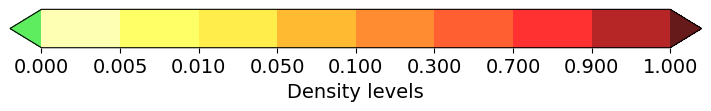

In [54]:
fig, ax = plt.subplots(figsize=(7, 1), layout='constrained')

colormap = plt.cm.YlOrRd
newColorMap = colormap(np.linspace(0, 1, 512))
newColorMap[0, :] = green
#newcmp = ListedColormap(newColorMap)

colormap = (mpl.colors.ListedColormap([green, lYelw, yelw, dYelw, lOrng, orng, dOrng, lred, Red, dRed]))
        #.with_extremes(under='yellow', over='magenta'))


bounds = [0, 0.005, 0.010, 0.05, 0.1, 0.3, 0.7, 0.9, 1]
norm = mpl.colors.BoundaryNorm(bounds, colormap.N, extend='both')
#norm = mpl.colors.LogNorm()#bounds[0], bounds[len(bounds)-1])
mappable = mpl.cm.ScalarMappable(cmap=colormap, norm=norm)

cmap = mappable.get_cmap()

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=colormap),
             cax=ax, orientation='horizontal', label='Density levels')

map_legend = plt.gcf()

plt.savefig('images/mapLegend.pdf', format="pdf", bbox_inches="tight")

In [6]:
def cColours(data):
    coloursMap = []
    for row in data:
        colours = []
        for col in row:
            if col == 0.0:
                colours.append(green)
            elif 0.0 < col < 0.005:
                colours.append(lYelw)
            elif 0.005 <= col < 0.015:
                colours.append(yelw)
            elif 0.015 <= col < 0.030:
                colours.append(dYelw)
            elif 0.030 <= col < 0.050:
                colours.append(lOrng)
            elif 0.050 <= col < 0.100:
                colours.append(orng)
            elif 0.100 <= col < 0.500:
                colours.append(dOrng)
            elif 0.500 <= col < 0.900:
                colours.append(lred)
            elif 0.900 <= col < 1:
                colours.append(Red)
            elif col == 1:
                colours.append(dRed)
            else:
                colours.append(white)
        coloursMap.append(colours)

    return coloursMap
    

In [7]:
def cColours2(data):
    coloursMap = []
    for row in data:
        colours = []
        for col in row:
            if col == 0.0:
                colours.append(green)
            elif 0.0 < col < 0.01:
                colours.append(lYelw)
            elif 0.01 <= col < 0.05:
                colours.append(yelw)
            elif 0.05 <= col < 0.10:
                colours.append(dYelw)
            elif 0.10 <= col < 0.20:
                colours.append(lOrng)
            elif 0.20 <= col < 0.40:
                colours.append(orng)
            elif 0.40 <= col < 0.60:
                colours.append(dOrng)
            elif 0.500 <= col < 0.900:
                colours.append(lred)
            elif 0.900 <= col < 1:
                colours.append(Red)
            elif col == 1:
                colours.append(dRed)
            else:
                colours.append(white)
        coloursMap.append(colours)

    return coloursMap

<h3>Function to make map

In [53]:
def plotMap(data, dict, img_name="density_map.pdf"):
    #rows = ('chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX', 'chrY')
    rows = ('chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY')
    cols = ["p34", "p33", "p32", "p31", "p30", "p29", "p28", "p27", "p26", "p25", "p24", "p23", "p22", "p21", "p20", "p19", "p18", "p17", "p16", "p15", "p14", "p13", "p12", "p11", "p10", "p09", "p08", "p07", "p06", "p05", "p04", "p03", "p02", "p01-centromer", "q01-centromer", "q02", "q03", "q04", "q05", "q06", "q07", "q08", "q09", "q10", "q11", "q12", "q13", "q14", "q15", "q16", "q17", "q18", "q19", "q20", "q21", "q22", "q23", "q24", "q25", "q26", "q27", "q28", "q29", "q30", "q31", "q32", "q33", "q34", "q35", "q36", "q37", "q38"]
    n_rows = len(data)
    n_cols = len(data[0])

    # Plot bars and create text labels for the table
    cell_text = []
    for row in rows:
        cell_text.append(dict[row])

    #Get some lists of color specs for row and column headers
    rcolors = plt.cm.BuPu(np.full(len(rows), 0.1))
    ccolors = plt.cm.BuPu(np.full(len(cols), 0.1))
    cellcolours = cColours(data)
    
    fig = plt.figure(linewidth=2,
           #edgecolor=fig_border,
           #facecolor=fig_background_color,
           tight_layout={'pad':1},
           figsize = (58, 32),
          )
    
    partition1 = fig.add_subplot(2, 1, 1)
    the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=cols,
                      rowLoc='right',
                      rowColours=rcolors,
                      colColours=ccolors,
                      cellColours=cellcolours,
                      loc='center')
    
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(6)
    the_table.scale(1, 8)

    table_cells = the_table.properties()["celld"]
    #print(table_cells.keys())
    cells = the_table.properties()["children"]
    #for cell in cells:
    #    print(cell)
    
    for i in range(len(cells[-24:])):
        the_table[i+1, -1].set_width(0.80)
        the_table[i+1, -1].set_fontsize(18)

    for j in range(72):
        if j != 33 and j != 34:
            the_table[0, j].set_fontsize(16)
        else:
            the_table[0, j].set_fontsize(7)

    #the_table.auto_set_column_width(-1)
    
    partition1.add_table(the_table)
    # Hide axes
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Hide axes border
    plt.box(on=None)
    
    partition2 = fig.add_subplot(2,1,2)
    partition2.axis('off')
    colormap = (mpl.colors.ListedColormap([green, lYelw, yelw, dYelw, lOrng, orng, dOrng, lred, Red, dRed]))
    
    bounds = [0, 0.005, 0.010, 0.05, 0.1, 0.3, 0.7, 0.9, 1]
    norm = mpl.colors.BoundaryNorm(bounds, colormap.N, extend='both')
    
    the_colorbar= fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=colormap), ax=partition2, orientation='horizontal', label='Density levels', shrink= 1/2)
    #shrink
    the_colorbar.ax.tick_params(labelsize=24)
    the_colorbar.set_label(label='Density levels', size=36,weight='bold')
    # Create image. plt.savefig ignores figure edge and face colors, so map them.
    plt.draw()
    #STR_dens_map = plt.gcf()
    
    #plt.savefig('images/STR_density_map.pdf', format="pdf", bbox_inches="tight")
    #plt.savefig('images/DR_density_map.png', format="png", bbox_inches="tight", dpi=300)
    plt.savefig('images/' + img_name, format="pdf", bbox_inches="tight")

<h3>Code for running the program

In [9]:
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)

In [ ]:
#citoPath_read = "/home/androx/Documents/trabalho/citobands/cytobandFiltered_ordered_str_dr.txt"
#cb_df = pd.read_csv(citoPath_read, sep="\t")

#dens_map = makeMap_dens(cb_df, "DR_density")
#dict_map= makeMap_dict(cb_df, "DR_density")

In [ ]:
#plot_1chr(cb_df, "chr18", "DR_density")

In [ ]:
#plotAll(cb_df, "DR_density")

In [ ]:
#DR_dens = plotMap(dens_map, dict_map)

In [ ]:
citoband_read = "/home/androx/Documents/trabalho/citobands/cytobandFiltered_processed_str_dr_dg_ordered.txt"
cb_df = pd.read_csv(citoband_read, sep="\t")
cb_df

In [11]:
def make_one_Dens(cytoband_df, dens = "Exons_density", img_name = "density_map.pdf"):
    dens_map = makeMap_dens(cytoband_df, dens)
    dict_map= makeMap_dict(cytoband_df, dens)

    plot_1chr(cytoband_df, "chr20", dens)
    plotAll(cytoband_df, dens)
    plotMap(dens_map, dict_map, img_name)

## CDS densities

In [ ]:
#make_one_Dens(cb_df, "CDSs_density", "CDSs_density_map.pdf")

In [ ]:
#make_one_Dens(cb_df, "CDSIntron_density", "CDSIntron_density_map.pdf")

In [ ]:
#make_one_Dens(cb_df, "CDSExon_density", "CDSExon_density_map.pdf")

## 5 prime UTR densities

In [ ]:
#make_one_Dens(cb_df, "5P_UTR_density", "5P_UTR_density_map.pdf")

In [ ]:
#make_one_Dens(cb_df, "UTR5Intron_density", "UTR5Intron_density_map.pdf")

In [ ]:
#make_one_Dens(cb_df, "UTR5Exon_density", "UTR5Exon_density_map.pdf")

## 3 prime UTR densities

In [ ]:
#make_one_Dens(cb_df, "3P_UTR_density", "3P_UTR_density_map.pdf")

In [ ]:
#make_one_Dens(cb_df, "UTR3Intron_density", "UTR3Intron_density_map.pdf")

In [ ]:
#make_one_Dens(cb_df, "UTR3Exon_density", "UTR3Exon_density_map.pdf")

## Total exon densities

In [ ]:
#make_one_Dens(cb_df, "Exons_density", "Exons_density_map.pdf")

In [ ]:
#make_one_Dens(cb_df, "Introns_density", "Introns_density_map.pdf")

## STRs and LTRs densities

In [61]:
citoband_read2 = "/home/androx/Documents/trabalho/citobands/cytobandFiltered_STRs_LTRs_ordered.txt"
cb_df2 = pd.read_csv(citoband_read2, sep="\t")
cb_df2

Chromossome  First_index  Last_index Citoband  Unkown      Size  \
0          chr1            0     2299999   p36.33    gneg   2299999   
1          chr1      2300000     5299999   p36.32  gpos25   2999999   
2          chr1      5300000     7099999   p36.31    gneg   1799999   
3          chr1      7100000     9099999   p36.23  gpos25   1999999   
4          chr1      9100000    12499999   p36.22    gneg   3399999   
..          ...          ...         ...      ...     ...       ...   
858        chrY     12400000    17099999  q11.221  gpos50   4699999   
859        chrY     17100000    19599999  q11.222    gneg   2499999   
860        chrY     19600000    23799999  q11.223  gpos50   4199999   
861        chrY     23800000    26599999   q11.23    gneg   2799999   
862        chrY     26600000    57227414      q12    gvar  30627414   

     STR_Density  STRs_df  LTRs_df  
0          0.088    0.006    0.084  
1          0.084    0.014    0.079  
2          0.056    0.013    0.051  
3          0.049    0.013    0.042  
4          0.056    0.011    0.049  
..           ...      ...      ...  
858        0.037    0.014    0.029  
859        0.062    0.016    0.053  
860        0.082    0.006    0.078  
861        0.026    0.009    0.021  
862        0.006    0.002    0.004  

[863 rows x 9 columns]

In [ ]:
make_one_Dens(cb_df2, "STR_Density", "STRs_only_density_map.pdf")

In [ ]:
make_one_Dens(cb_df2, "STRs_df", "STRs_only_density_map.pdf")

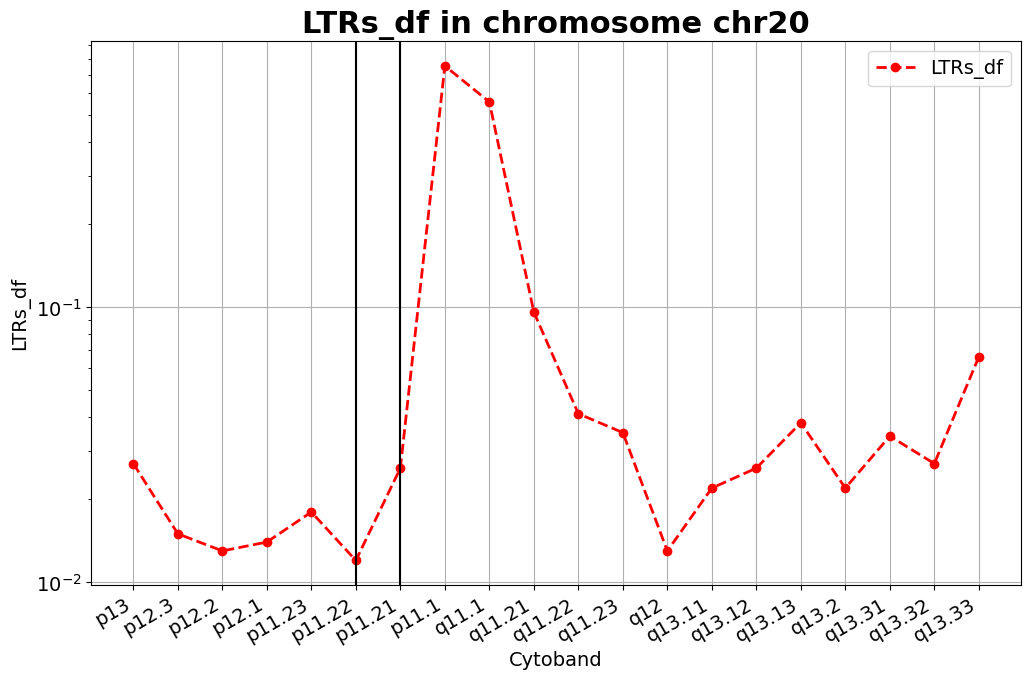

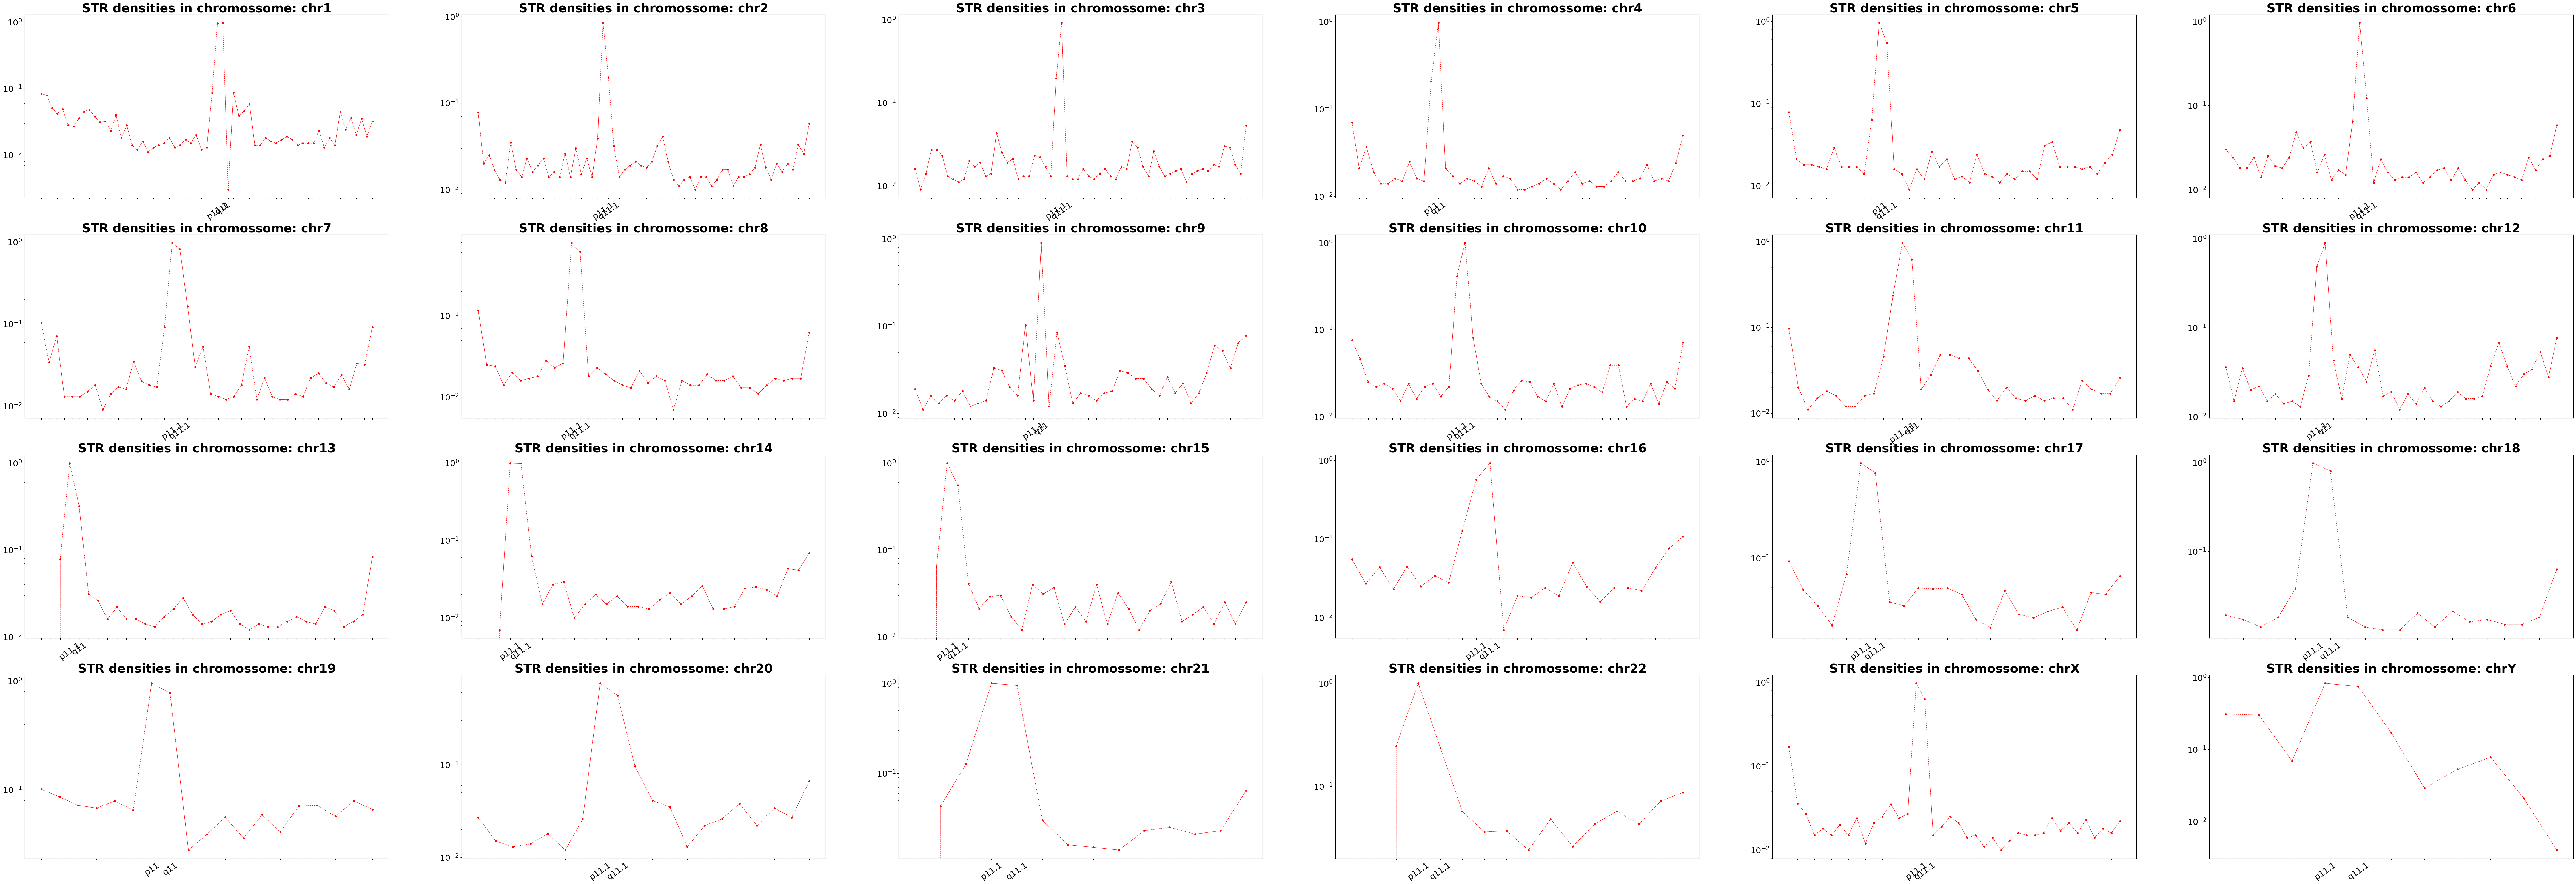

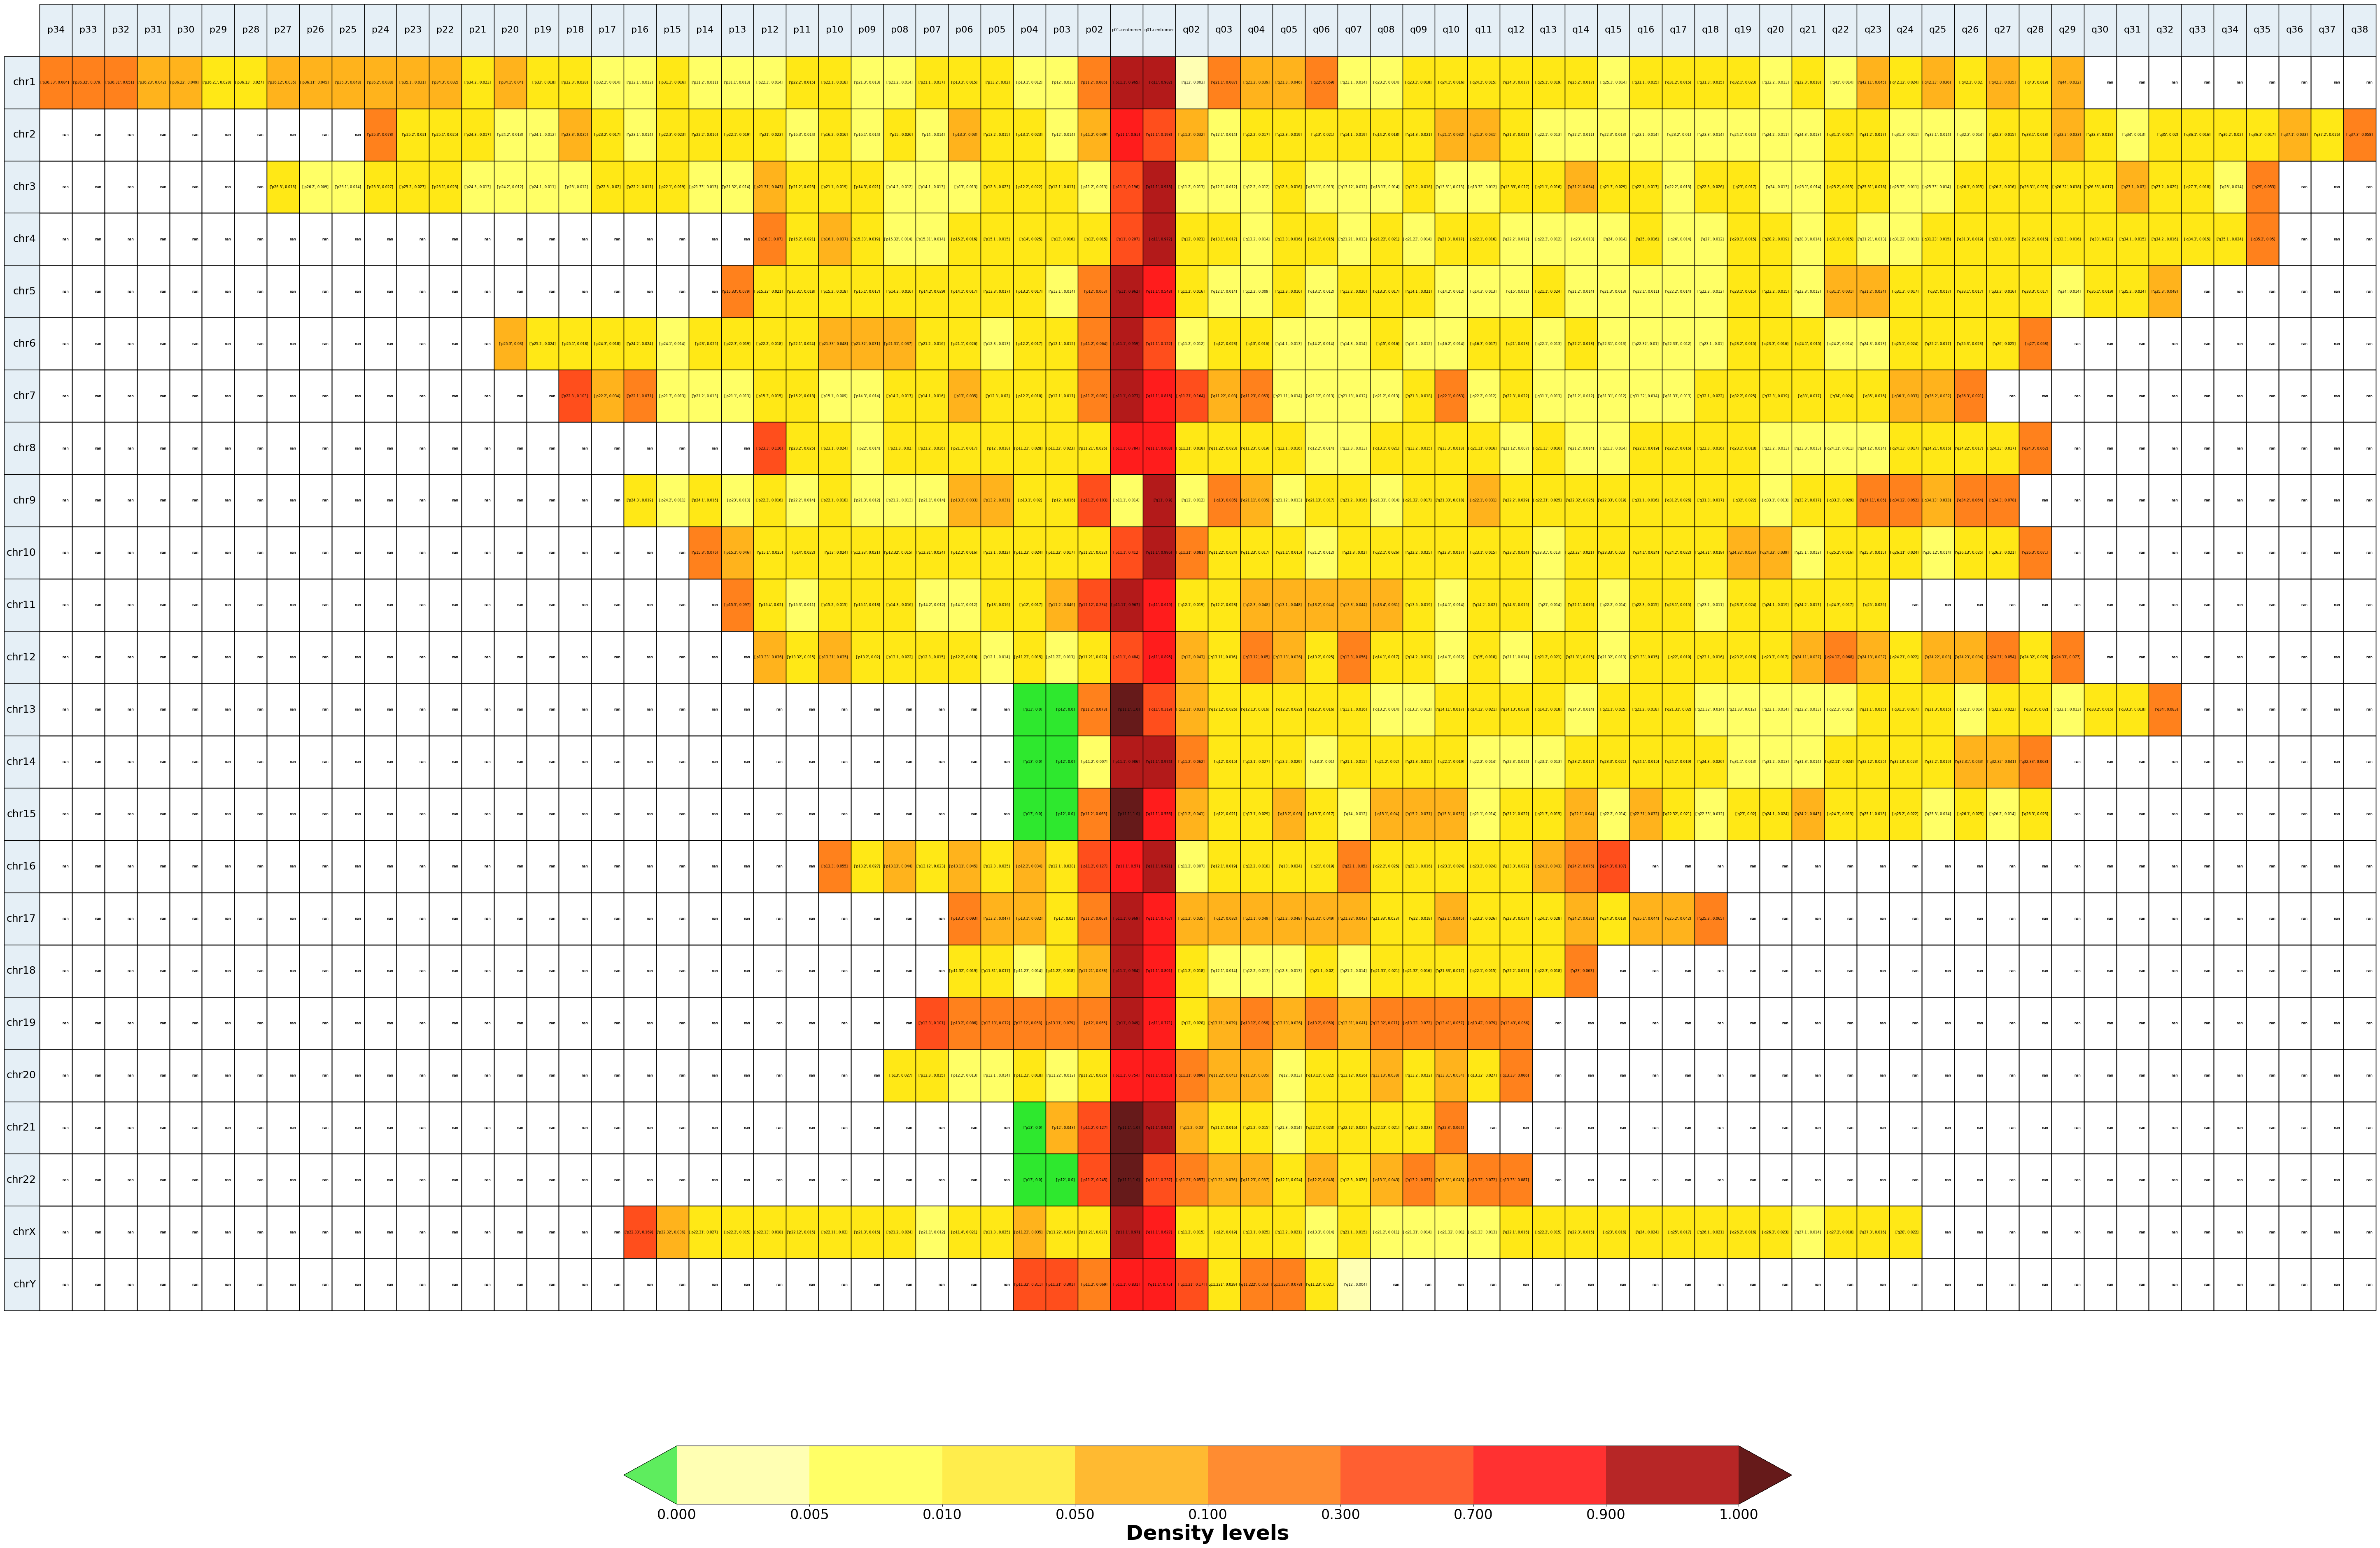

In [16]:
make_one_Dens(cb_df2, "LTRs_df", "LTRs_only_density_map.pdf")

cytobandFiltered_STRs_LTRs_ordered.txt

## Gráficos e mapa de gvs

In [17]:
latesCB_file_read = "/home/androx/Documents/trabalho/citobands/Latest_gvs/cytobandFiltered_processed_str_dr_dg_gv_ALLCHR.txt"
cb_df3 = pd.read_csv(latesCB_file_read, sep="\t")

In [18]:
cb_df3

Chromossome  First_index  Last_index Citoband  Unkown      Size  \
0          chr1            0     2299999   p36.33    gneg   2299999   
1          chr1      2300000     5299999   p36.32  gpos25   2999999   
2          chr1      5300000     7099999   p36.31    gneg   1799999   
3          chr1      7100000     9099999   p36.23  gpos25   1999999   
4          chr1      9100000    12499999   p36.22    gneg   3399999   
..          ...          ...         ...      ...     ...       ...   
857        chrY     12400000    17099999  q11.221  gpos50   4699999   
858        chrY     17100000    19599999  q11.222    gneg   2499999   
859        chrY     19600000    23799999  q11.223  gpos50   4199999   
860        chrY     23800000    26599999   q11.23    gneg   2799999   
861        chrY     26600000    57227414      q12    gvar  30627414   

     STR_Density  DR_density  CDSs_density  CDSIntron_density  ...  \
0          0.088       0.326         0.038              0.022  ...   
1          0.084       0.282         0.016              0.011  ...   
2          0.056       0.275         0.024              0.010  ...   
3          0.049       0.405         0.013              0.004  ...   
4          0.056       0.404         0.030              0.010  ...   
..           ...         ...           ...                ...  ...   
857        0.037       0.015         0.004              0.001  ...   
858        0.062       0.013         0.002              0.004  ...   
859        0.082       0.006         0.005              0.004  ...   
860        0.026       0.002         0.003              0.002  ...   
861        0.006       0.001         0.000              0.000  ...   

     UTR5Exon_density  3P_UTR_density  UTR3Intron_density  UTR3Exon_density  \
0               0.021           0.012               0.025             0.019   
1               0.014           0.004               0.013             0.006   
2               0.020           0.006               0.012             0.010   
3               0.010           0.005               0.004             0.004   
4               0.019           0.005               0.014             0.010   
..                ...             ...                 ...               ...   
857             0.003           0.001               0.001             0.003   
858             0.003           0.000               0.004             0.002   
859             0.002           0.001               0.005             0.002   
860             0.001           0.001               0.003             0.001   
861             0.000           0.000               0.000             0.000   

     Exons_density  Introns_density  SNP_density  Indel_density  \
0            0.171            0.069        0.022          0.006   
1            0.079            0.034        0.033          0.009   
2            0.082            0.031        0.031          0.009   
3            0.047            0.011        0.028          0.010   
4            0.093            0.034        0.028          0.009   
..             ...              ...          ...            ...   
857          0.016            0.003        0.000          0.000   
858          0.045            0.012        0.000          0.000   
859          0.036            0.013        0.000          0.000   
860          0.034            0.008        0.000          0.000   
861          0.001            0.000        0.000          0.000   

     Inserts_density  Deletes_density  
0              0.002            0.005  
1              0.002            0.007  
2              0.002            0.007  
3              0.002            0.007  
4              0.002            0.006  
..               ...              ...  
857            0.000            0.000  
858            0.000            0.000  
859            0.000            0.000  
860            0.000            0.000  
861            0.000            0.000  

[862 rows x 23 columns]

In [34]:
cb_df3_chrX = cb_df3.loc[cb_df3["Chromossome"] == "chrX"]
cb_df3_chrX

Chromossome  First_index  Last_index Citoband   Unkown     Size  \
811        chrX            0     4399999   p22.33     gneg  4399999   
812        chrX      4400000     6099999   p22.32   gpos50  1699999   
813        chrX      6100000     9599999   p22.31     gneg  3499999   
814        chrX      9600000    17399999    p22.2   gpos50  7799999   
815        chrX     17400000    19199999   p22.13     gneg  1799999   
816        chrX     19200000    21899999   p22.12   gpos50  2699999   
817        chrX     21900000    24899999   p22.11     gneg  2999999   
818        chrX     24900000    29299999    p21.3  gpos100  4399999   
819        chrX     29300000    31499999    p21.2     gneg  2199999   
820        chrX     31500000    37799999    p21.1  gpos100  6299999   
821        chrX     37800000    42499999    p11.4     gneg  4699999   
822        chrX     42500000    47599999    p11.3   gpos75  5099999   
823        chrX     47600000    50099999   p11.23     gneg  2499999   
824        chrX     50100000    54799999   p11.22   gpos25  4699999   
825        chrX     54800000    58099999   p11.21     gneg  3299999   
826        chrX     58100000    60999999    p11.1     acen  2899999   
827        chrX     61000000    63799999    q11.1     acen  2799999   
828        chrX     63800000    65399999    q11.2     gneg  1599999   
829        chrX     65400000    68499999      q12   gpos50  3099999   
830        chrX     68500000    72999999    q13.1     gneg  4499999   
831        chrX     73000000    74699999    q13.2   gpos50  1699999   
832        chrX     74700000    76799999    q13.3     gneg  2099999   
833        chrX     76800000    85399999    q21.1  gpos100  8599999   
834        chrX     85400000    86999999    q21.2     gneg  1599999   
835        chrX     87000000    92699999   q21.31  gpos100  5699999   
836        chrX     92700000    94299999   q21.32     gneg  1599999   
837        chrX     94300000    99099999   q21.33   gpos75  4799999   
838        chrX     99100000   103299999    q22.1     gneg  4199999   
839        chrX    103300000   104499999    q22.2   gpos50  1199999   
840        chrX    104500000   109399999    q22.3     gneg  4899999   
841        chrX    109400000   117399999      q23   gpos75  7999999   
842        chrX    117400000   121799999      q24     gneg  4399999   
843        chrX    121800000   129499999      q25  gpos100  7699999   
844        chrX    129500000   131299999    q26.1     gneg  1799999   
845        chrX    131300000   134499999    q26.2   gpos25  3199999   
846        chrX    134500000   138899999    q26.3     gneg  4399999   
847        chrX    138900000   141199999    q27.1   gpos75  2299999   
848        chrX    141200000   142999999    q27.2     gneg  1799999   
849        chrX    143000000   147999999    q27.3  gpos100  4999999   
850        chrX    148000000   156040894      q28     gneg  8040894   

     STR_Density  DR_density  CDSs_density  CDSIntron_density  ...  \
811        0.188       0.128         0.009              0.004  ...   
812        0.049       0.034         0.001              0.001  ...   
813        0.033       0.112         0.003              0.001  ...   
814        0.019       0.194         0.010              0.006  ...   
815        0.023       0.168         0.014              0.008  ...   
816        0.019       0.163         0.009              0.006  ...   
817        0.025       0.152         0.011              0.003  ...   
818        0.019       0.041         0.003              0.000  ...   
819        0.029       0.105         0.007              0.001  ...   
820        0.016       0.043         0.005              0.002  ...   
821        0.026       0.217         0.009              0.004  ...   
822        0.030       0.177         0.009              0.005  ...   
823        0.041       0.182         0.031              0.021  ...   
824        0.029       0.088         0.019              0.007  ...   
825        0.030       0.062         0.009

IndexError: index -1 is out of bounds for axis 0 with size 0

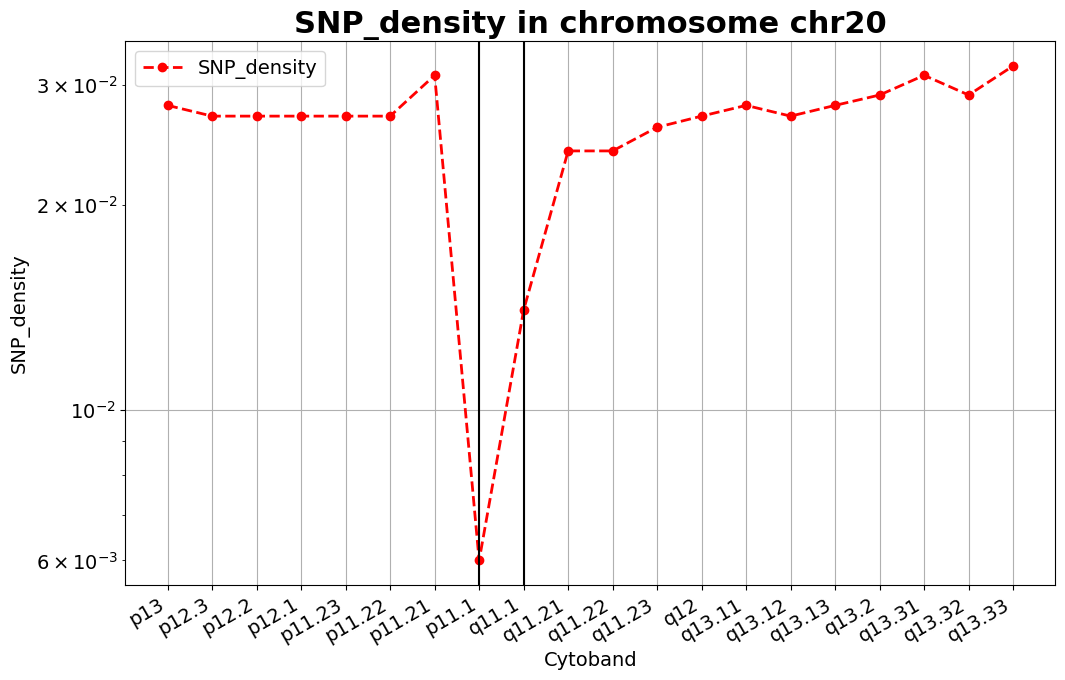

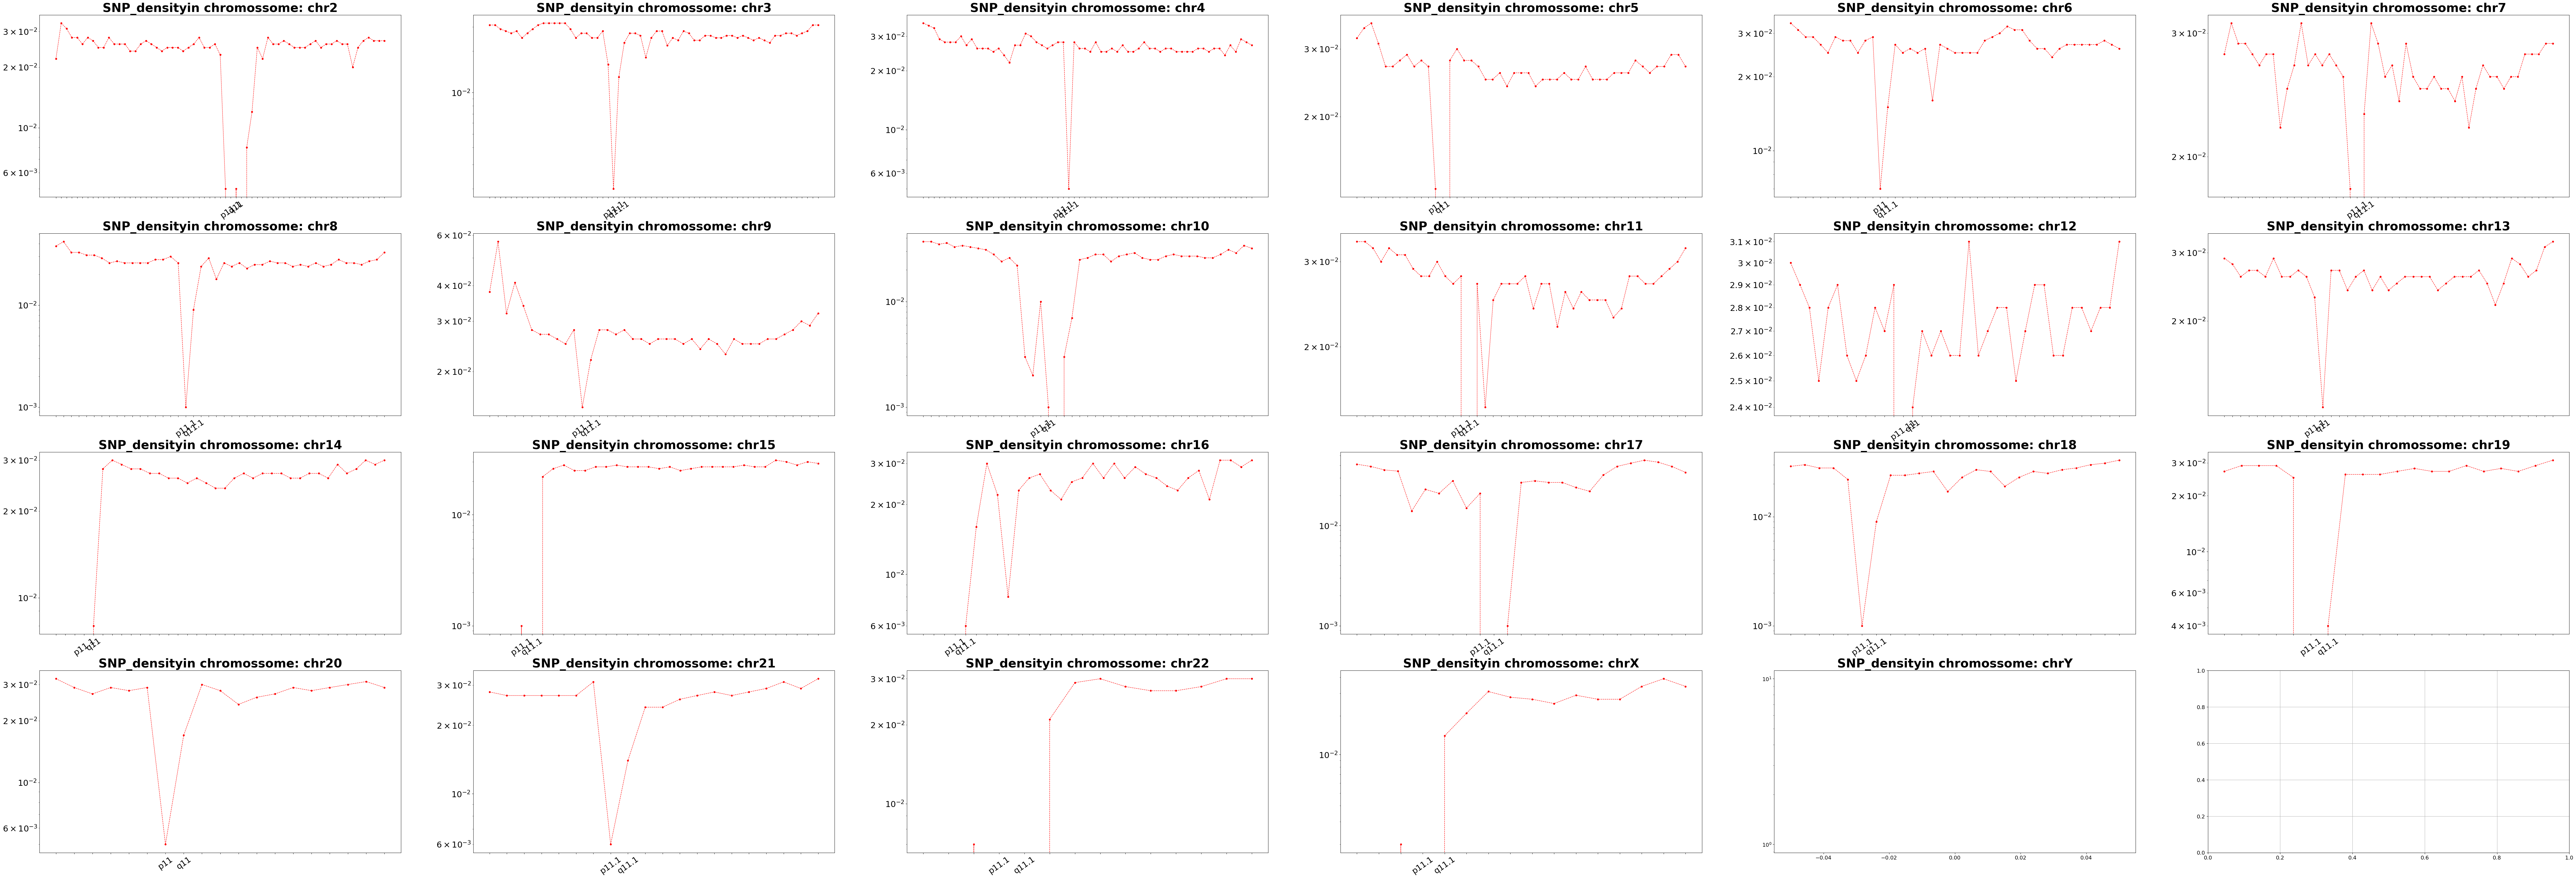

In [72]:
make_one_Dens(cb_df3, "SNP_density", "SNP_density_map.pdf")

/tmp/ipykernel_5174/3645087856.py:55: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis[i, j].set_yscale('log')


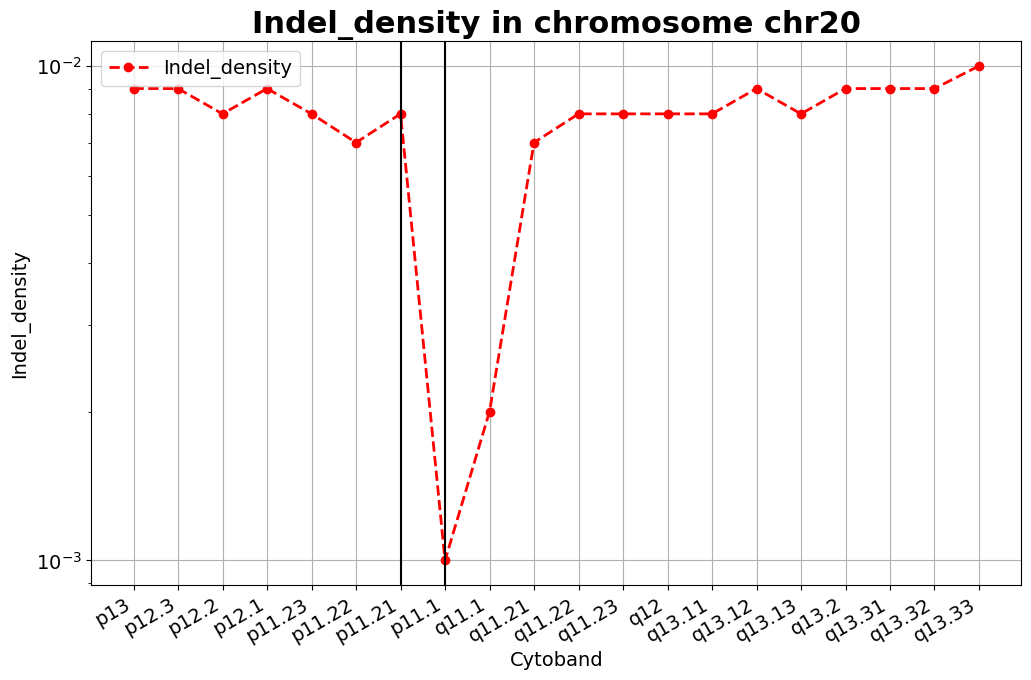

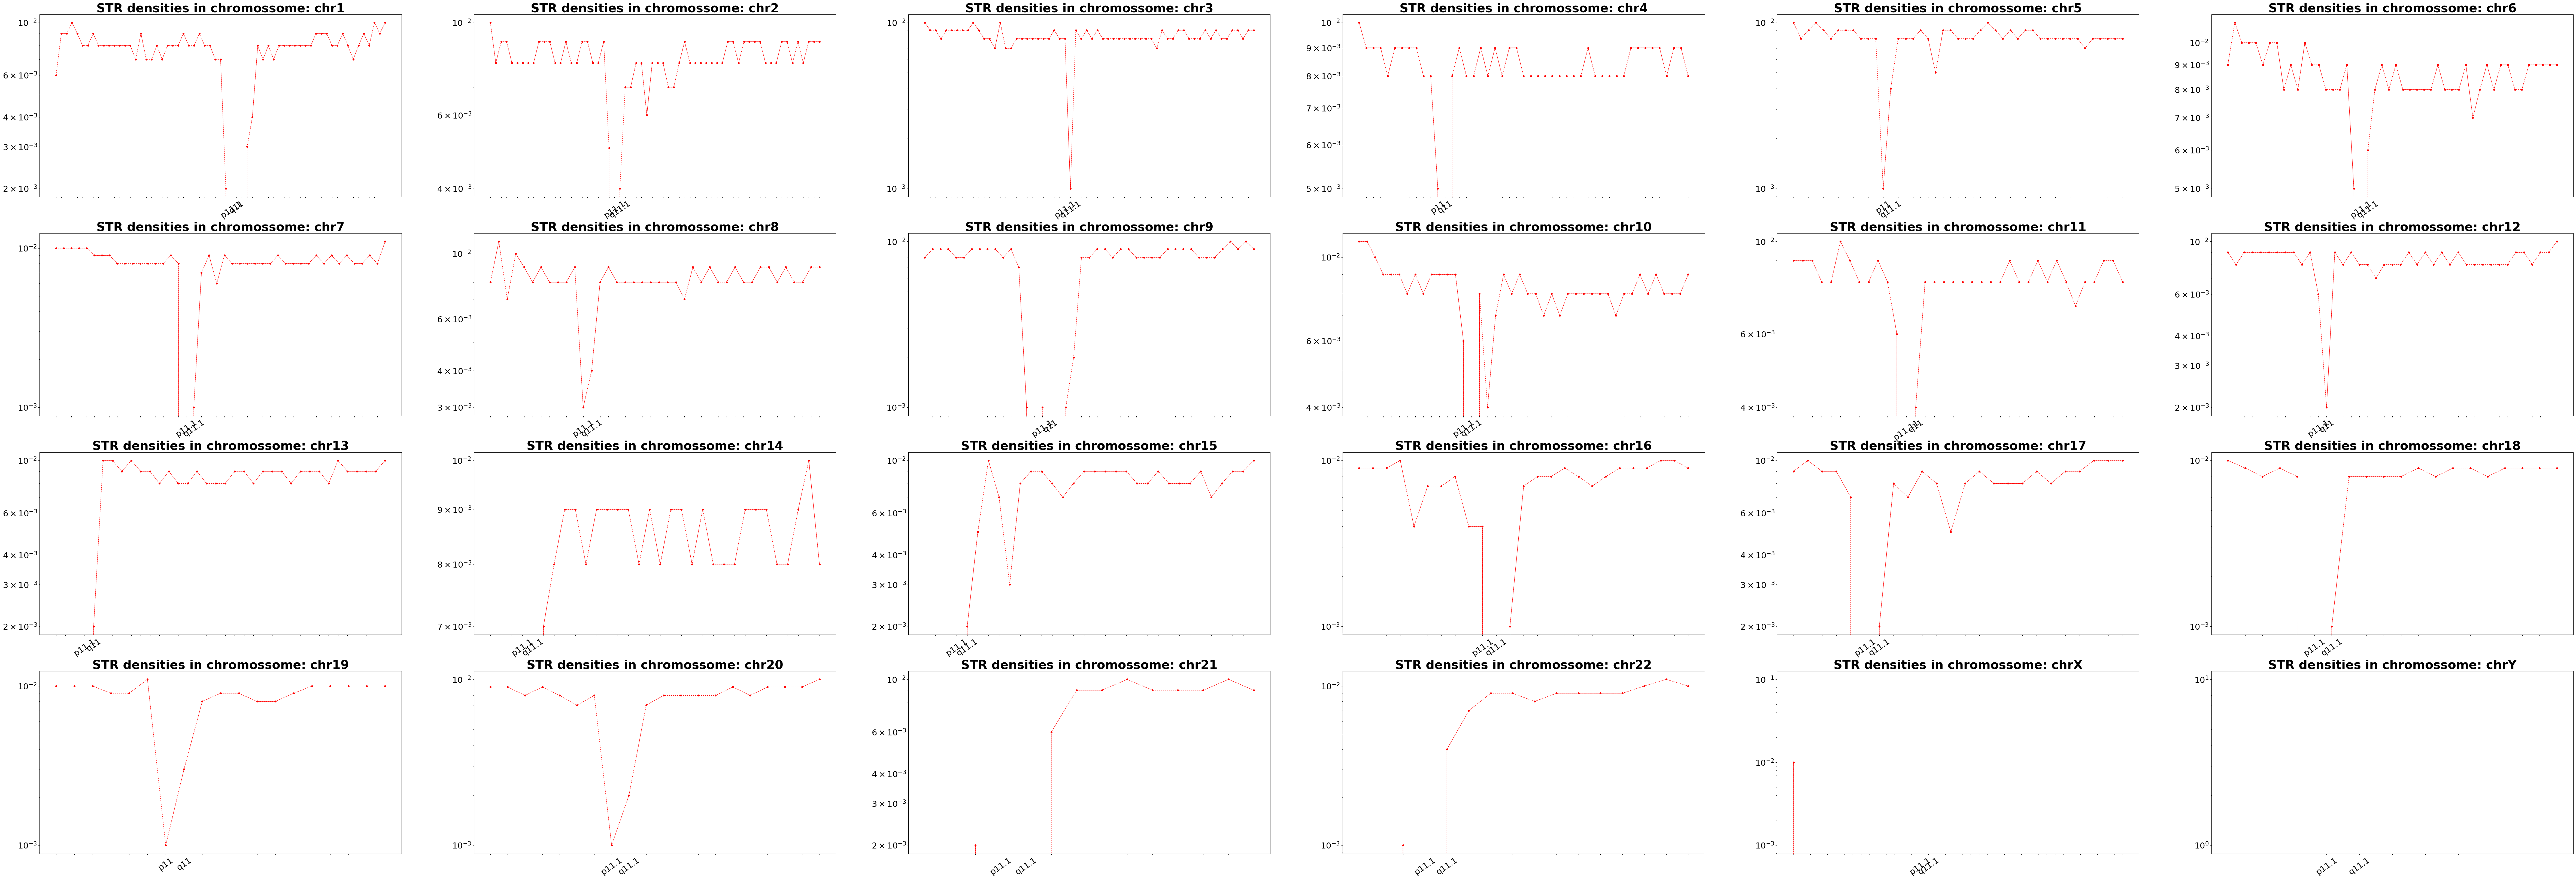

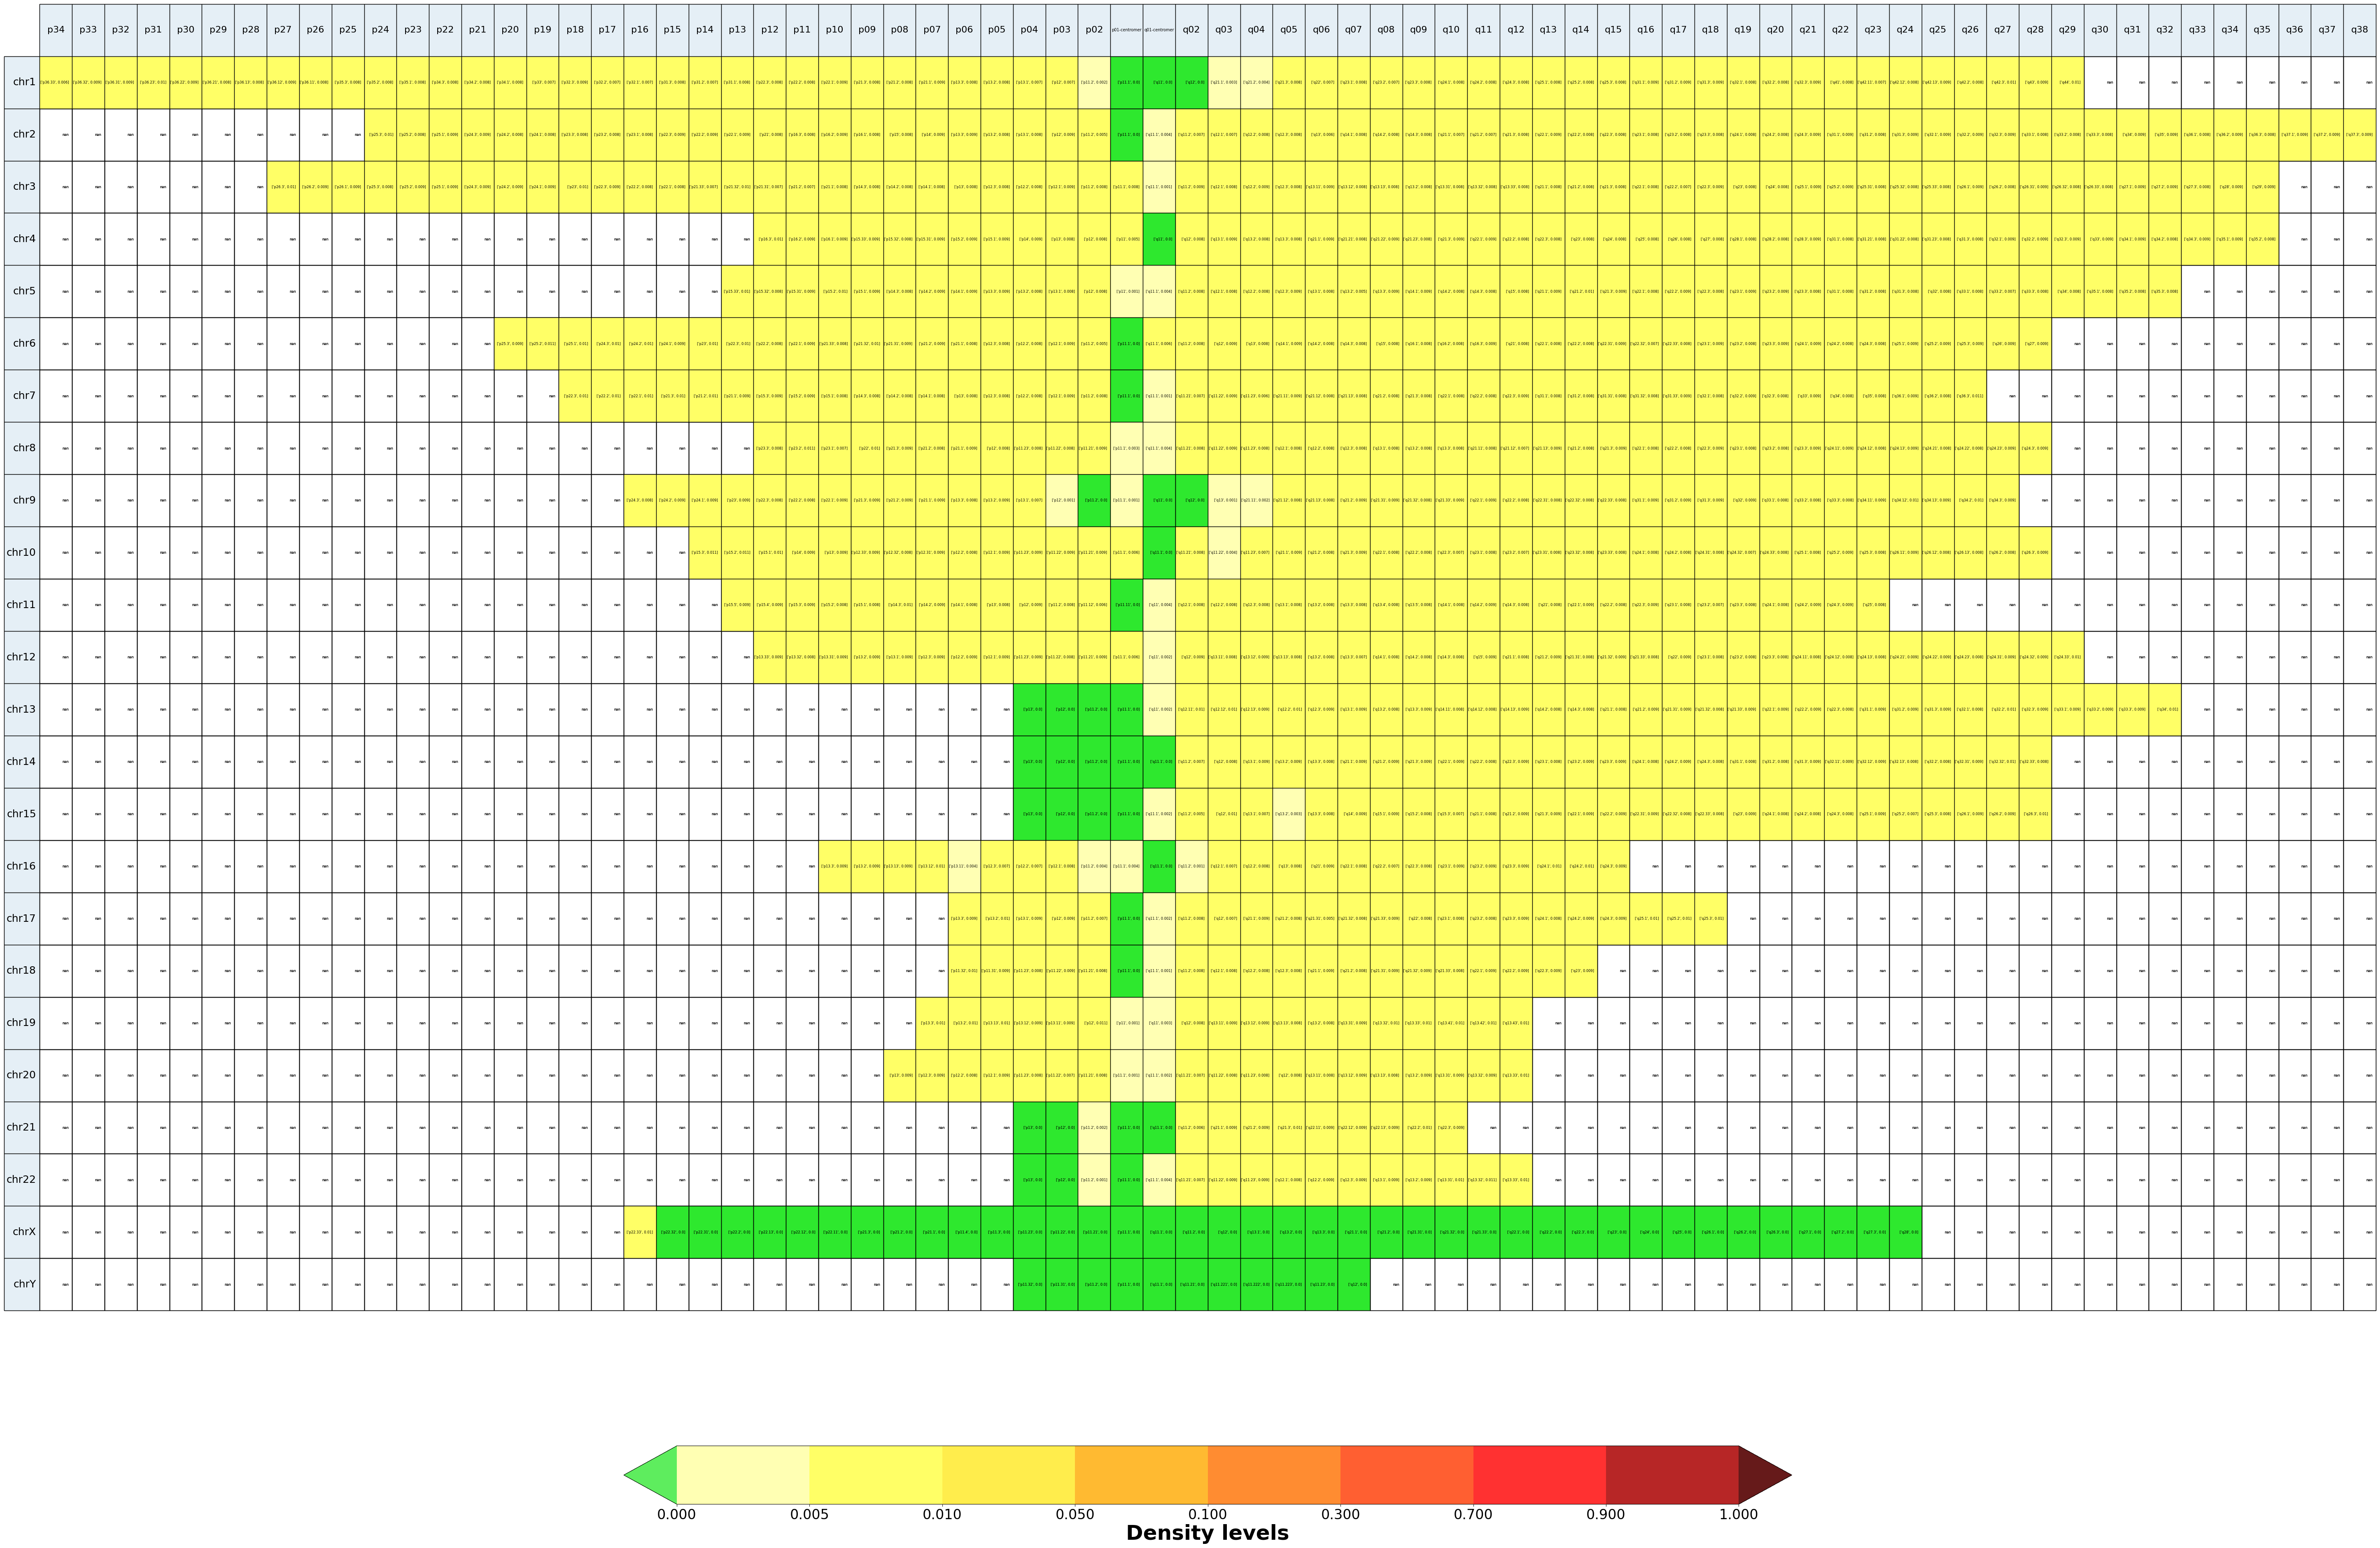

In [46]:
make_one_Dens(cb_df3, "Indel_density", "Indel_density_map.pdf")

/tmp/ipykernel_5174/4234898061.py:55: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis[i, j].set_yscale('log')


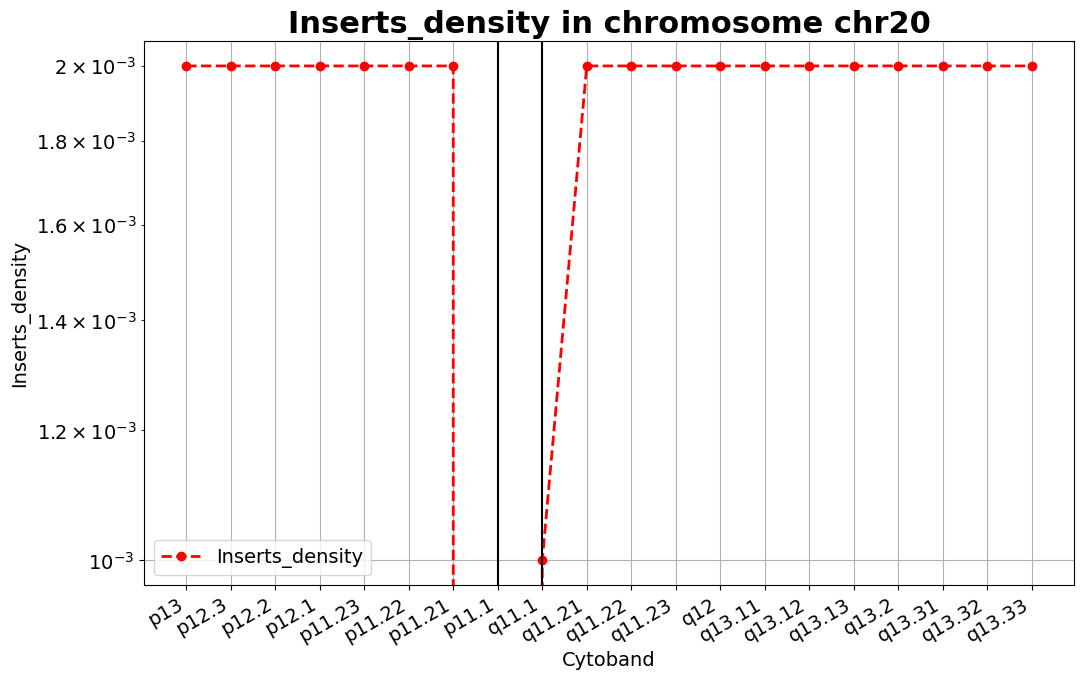

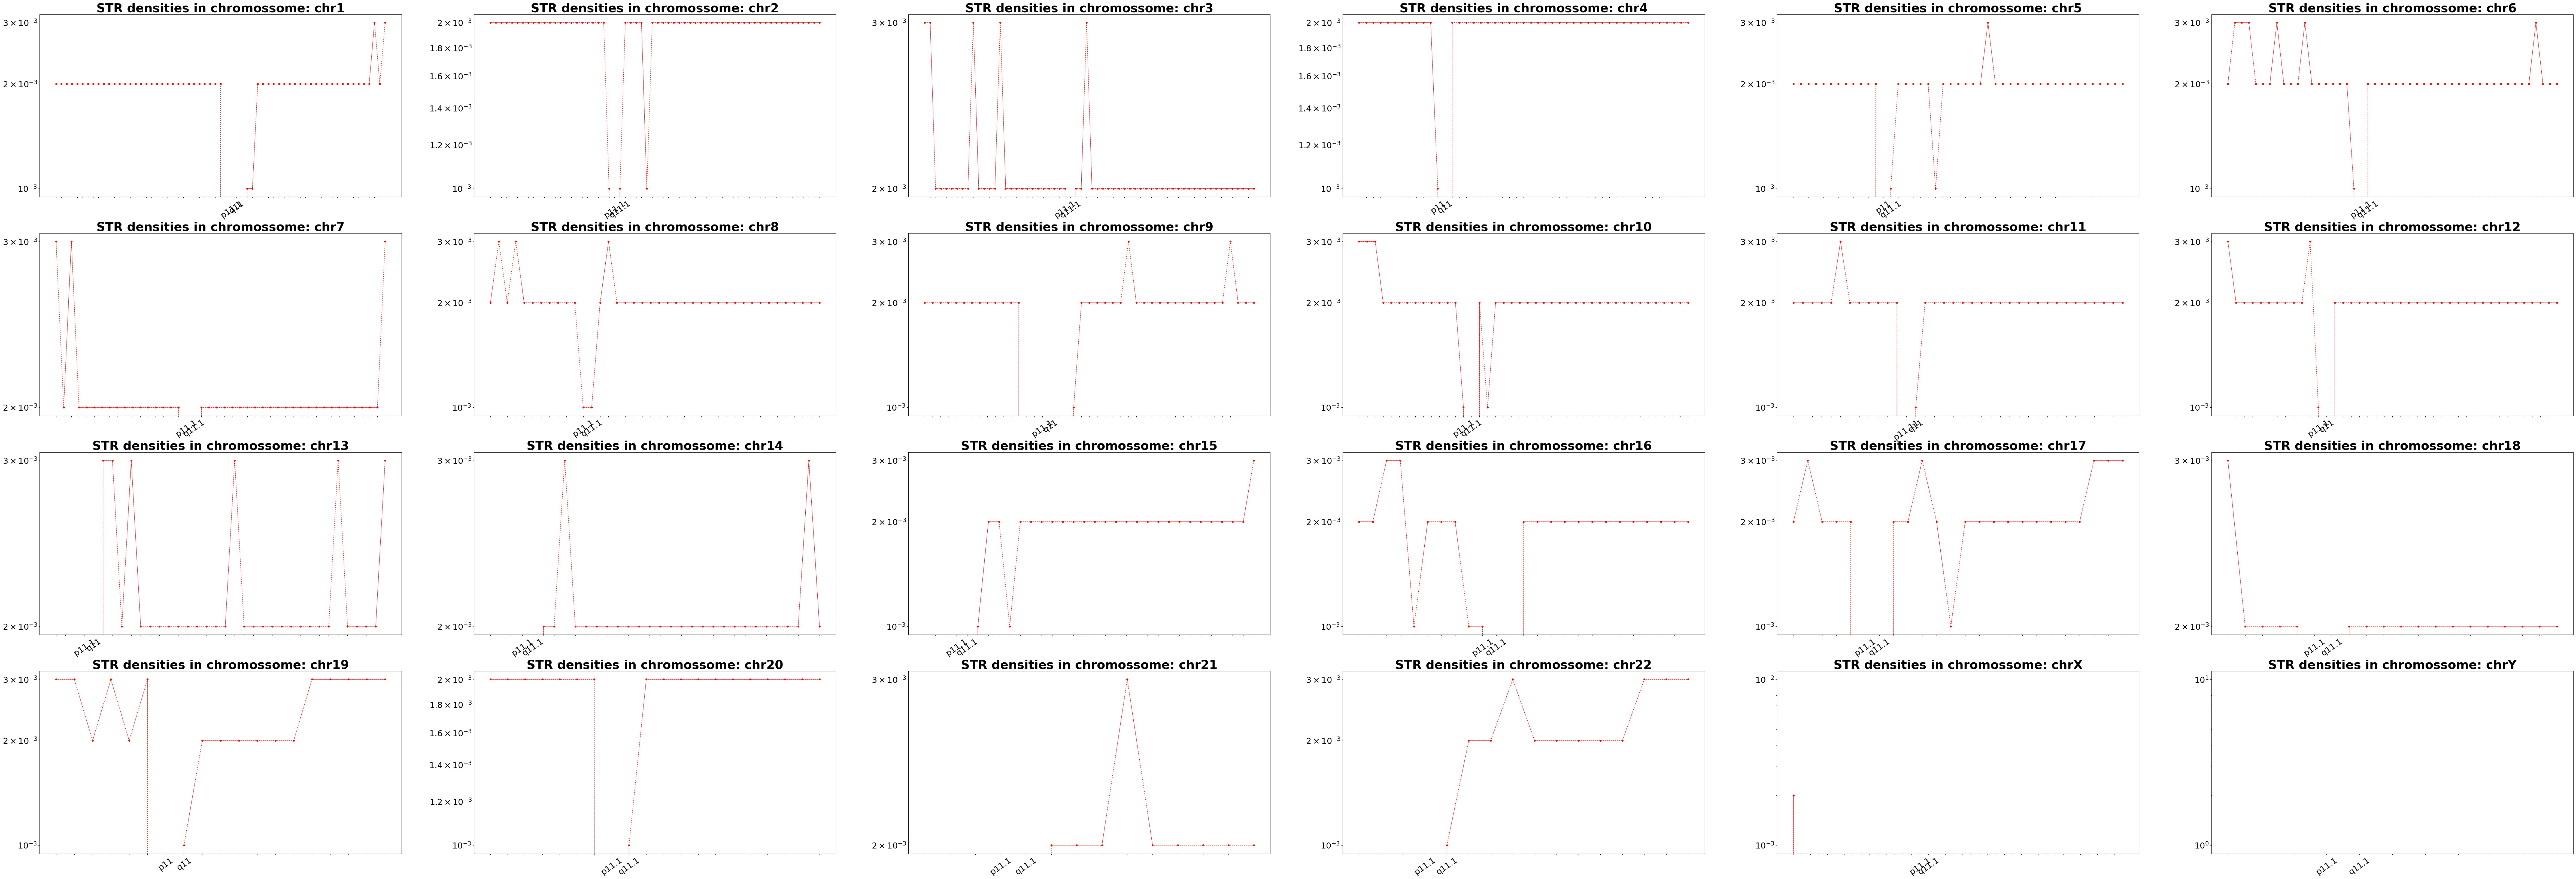

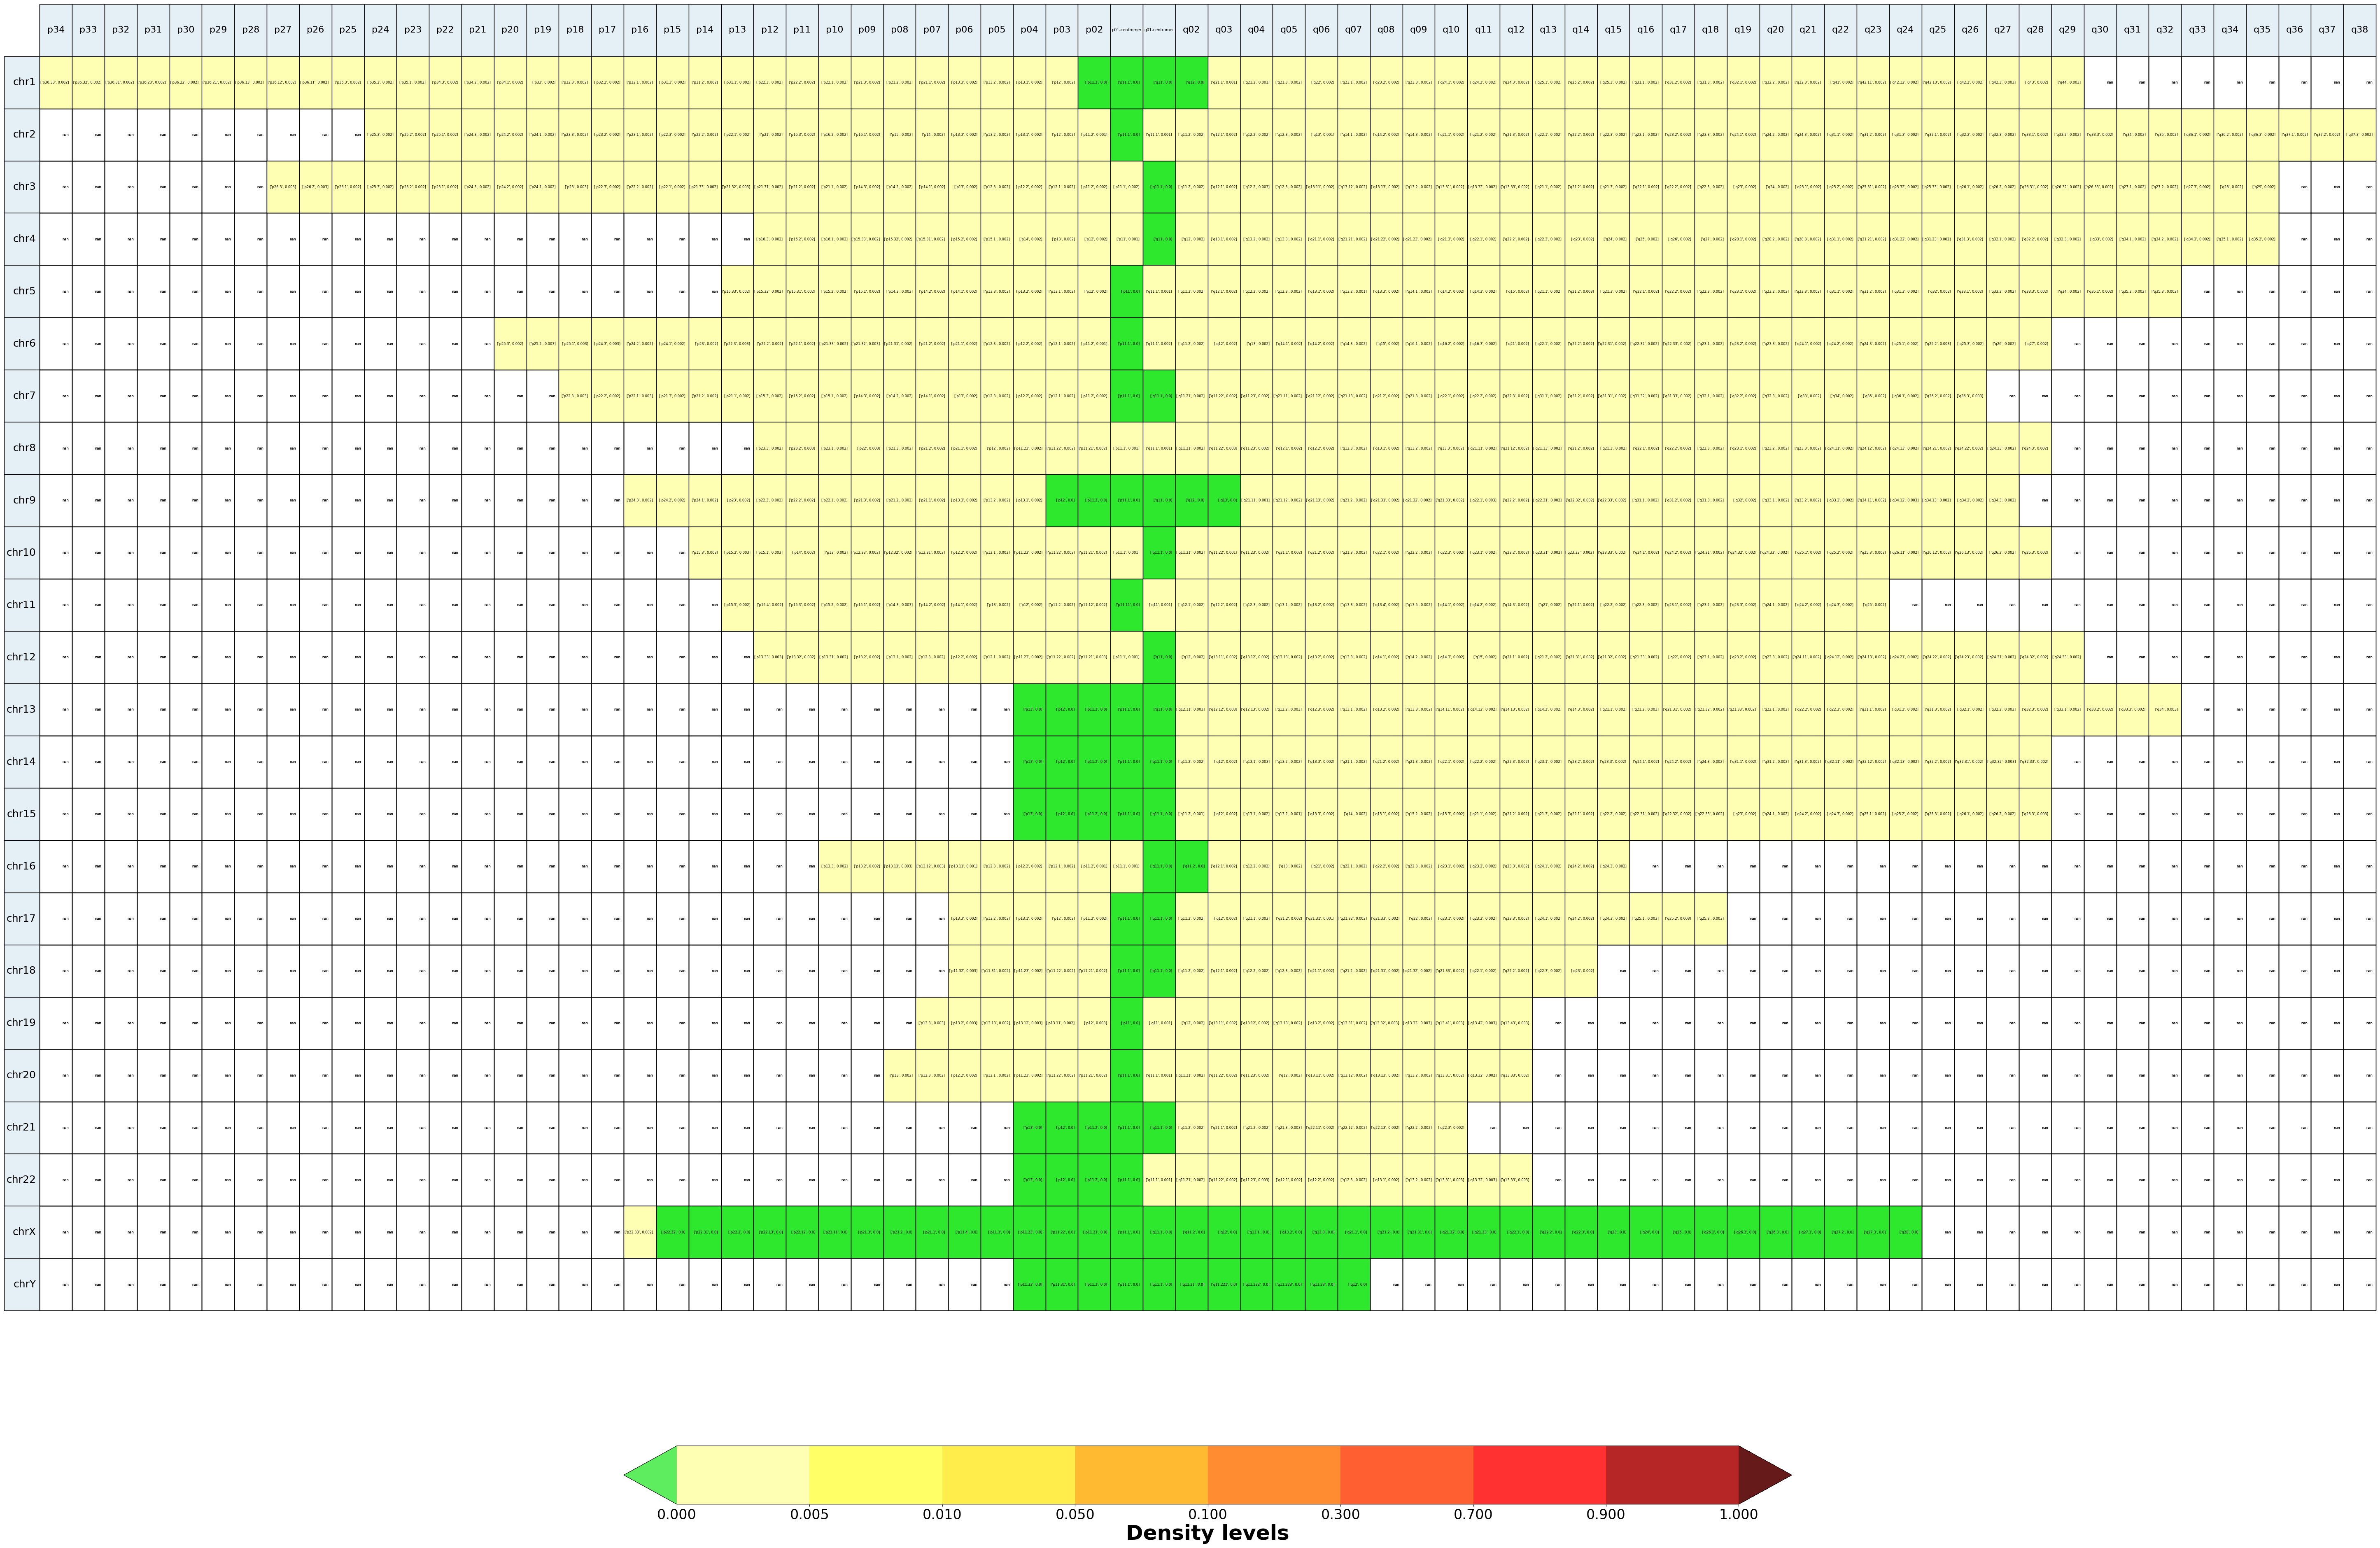

In [48]:
make_one_Dens(cb_df3, "Inserts_density", "Inserts_density_map.pdf")

/tmp/ipykernel_5174/4234898061.py:55: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis[i, j].set_yscale('log')


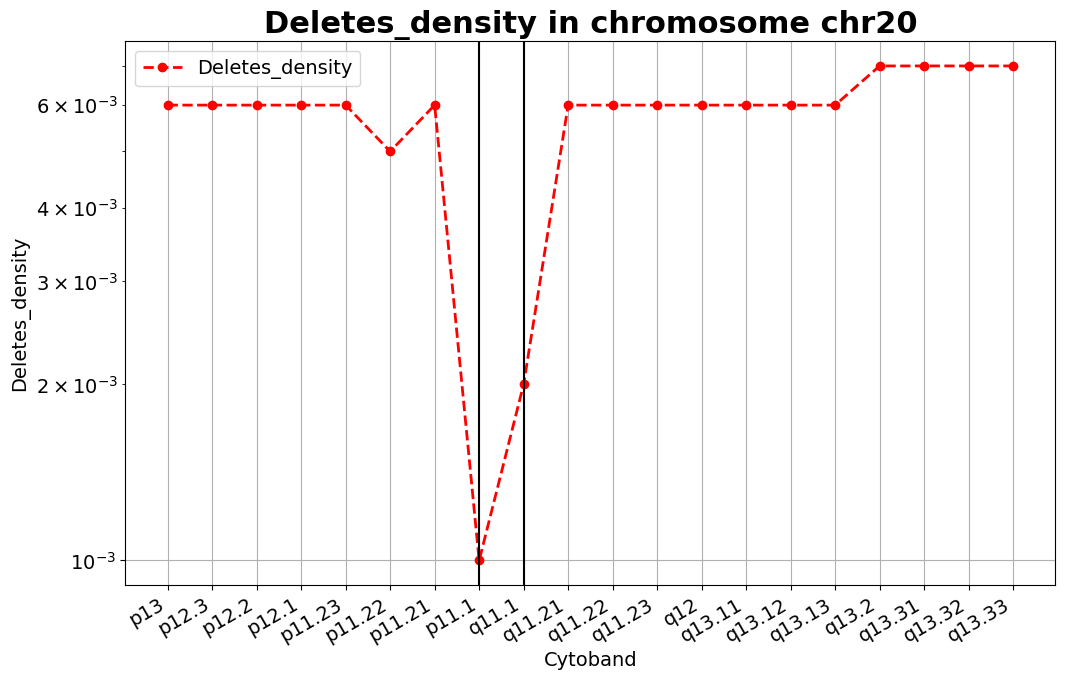

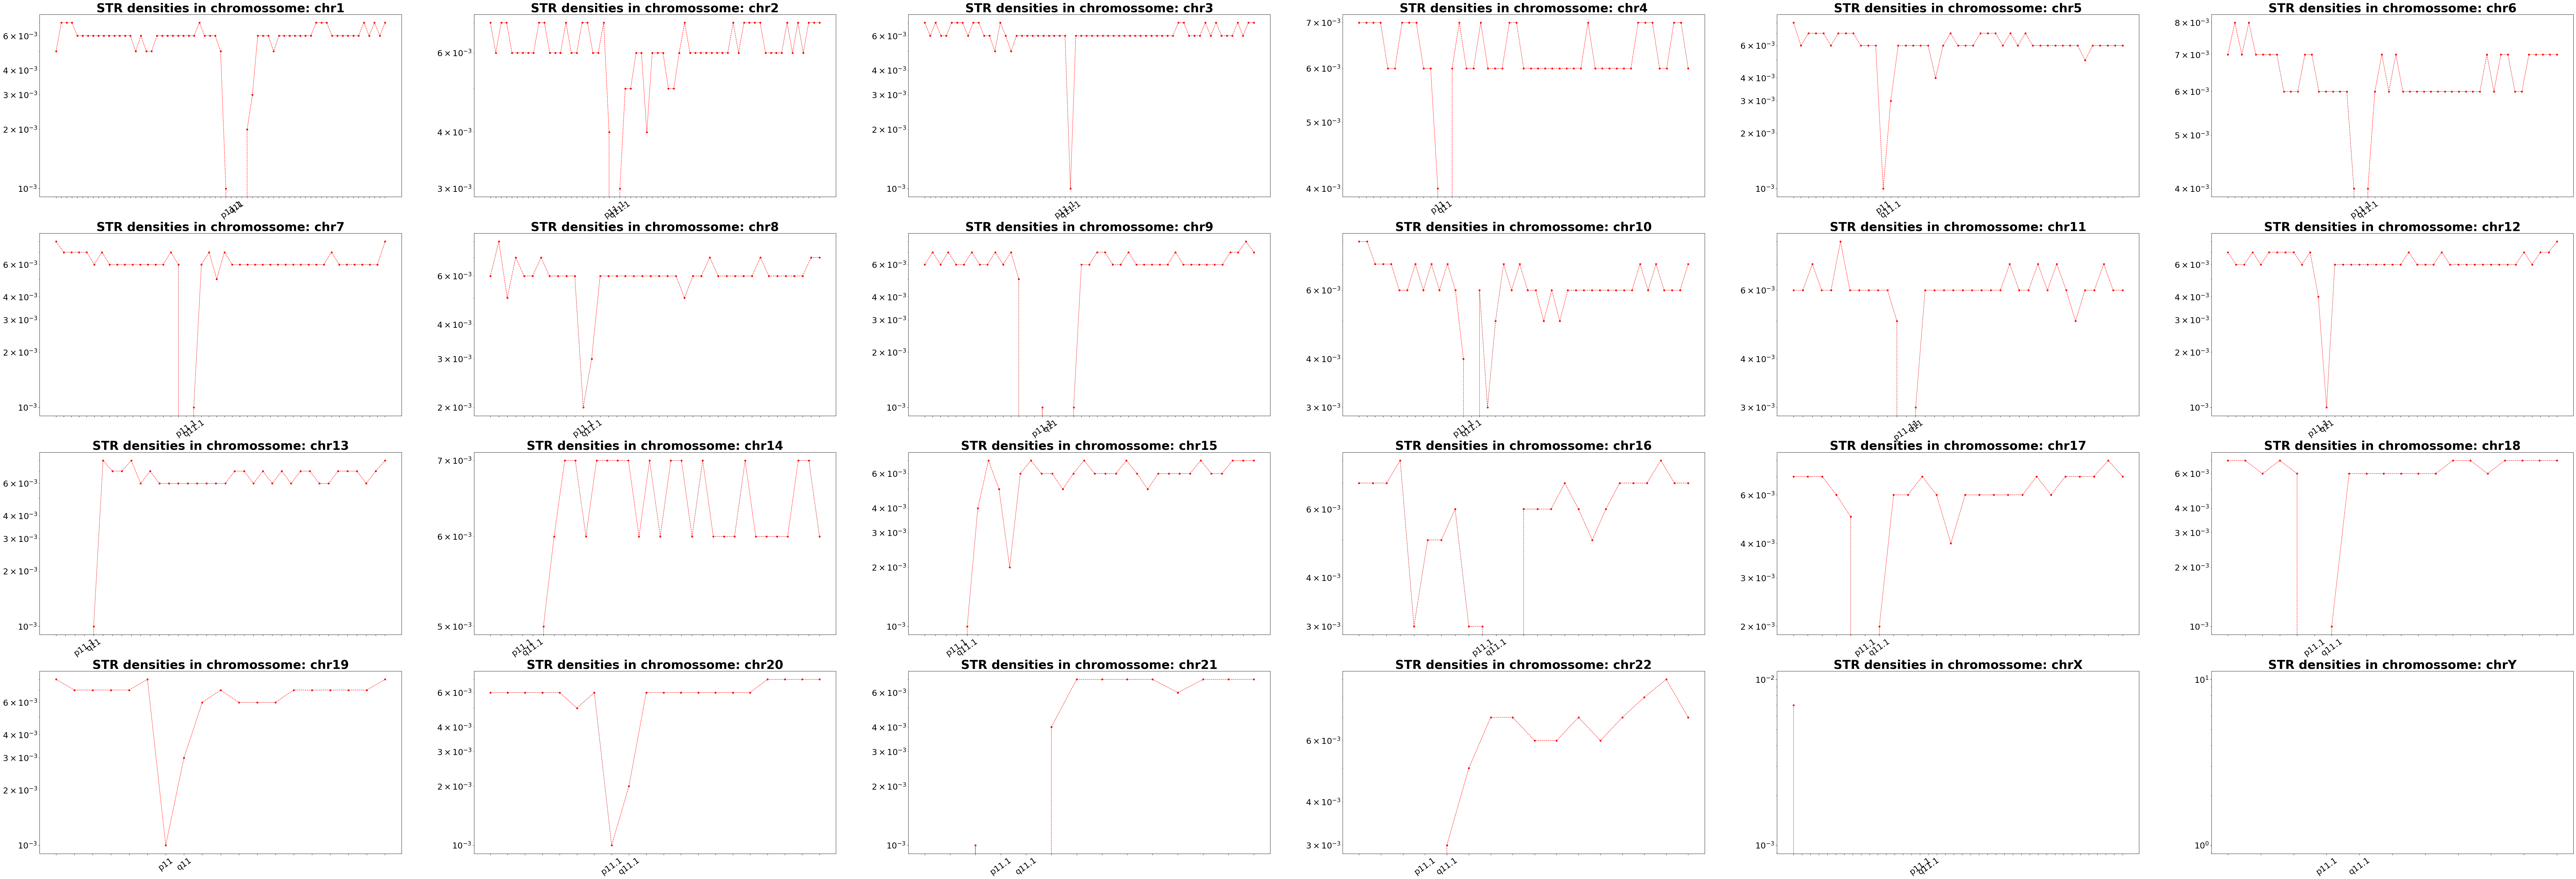

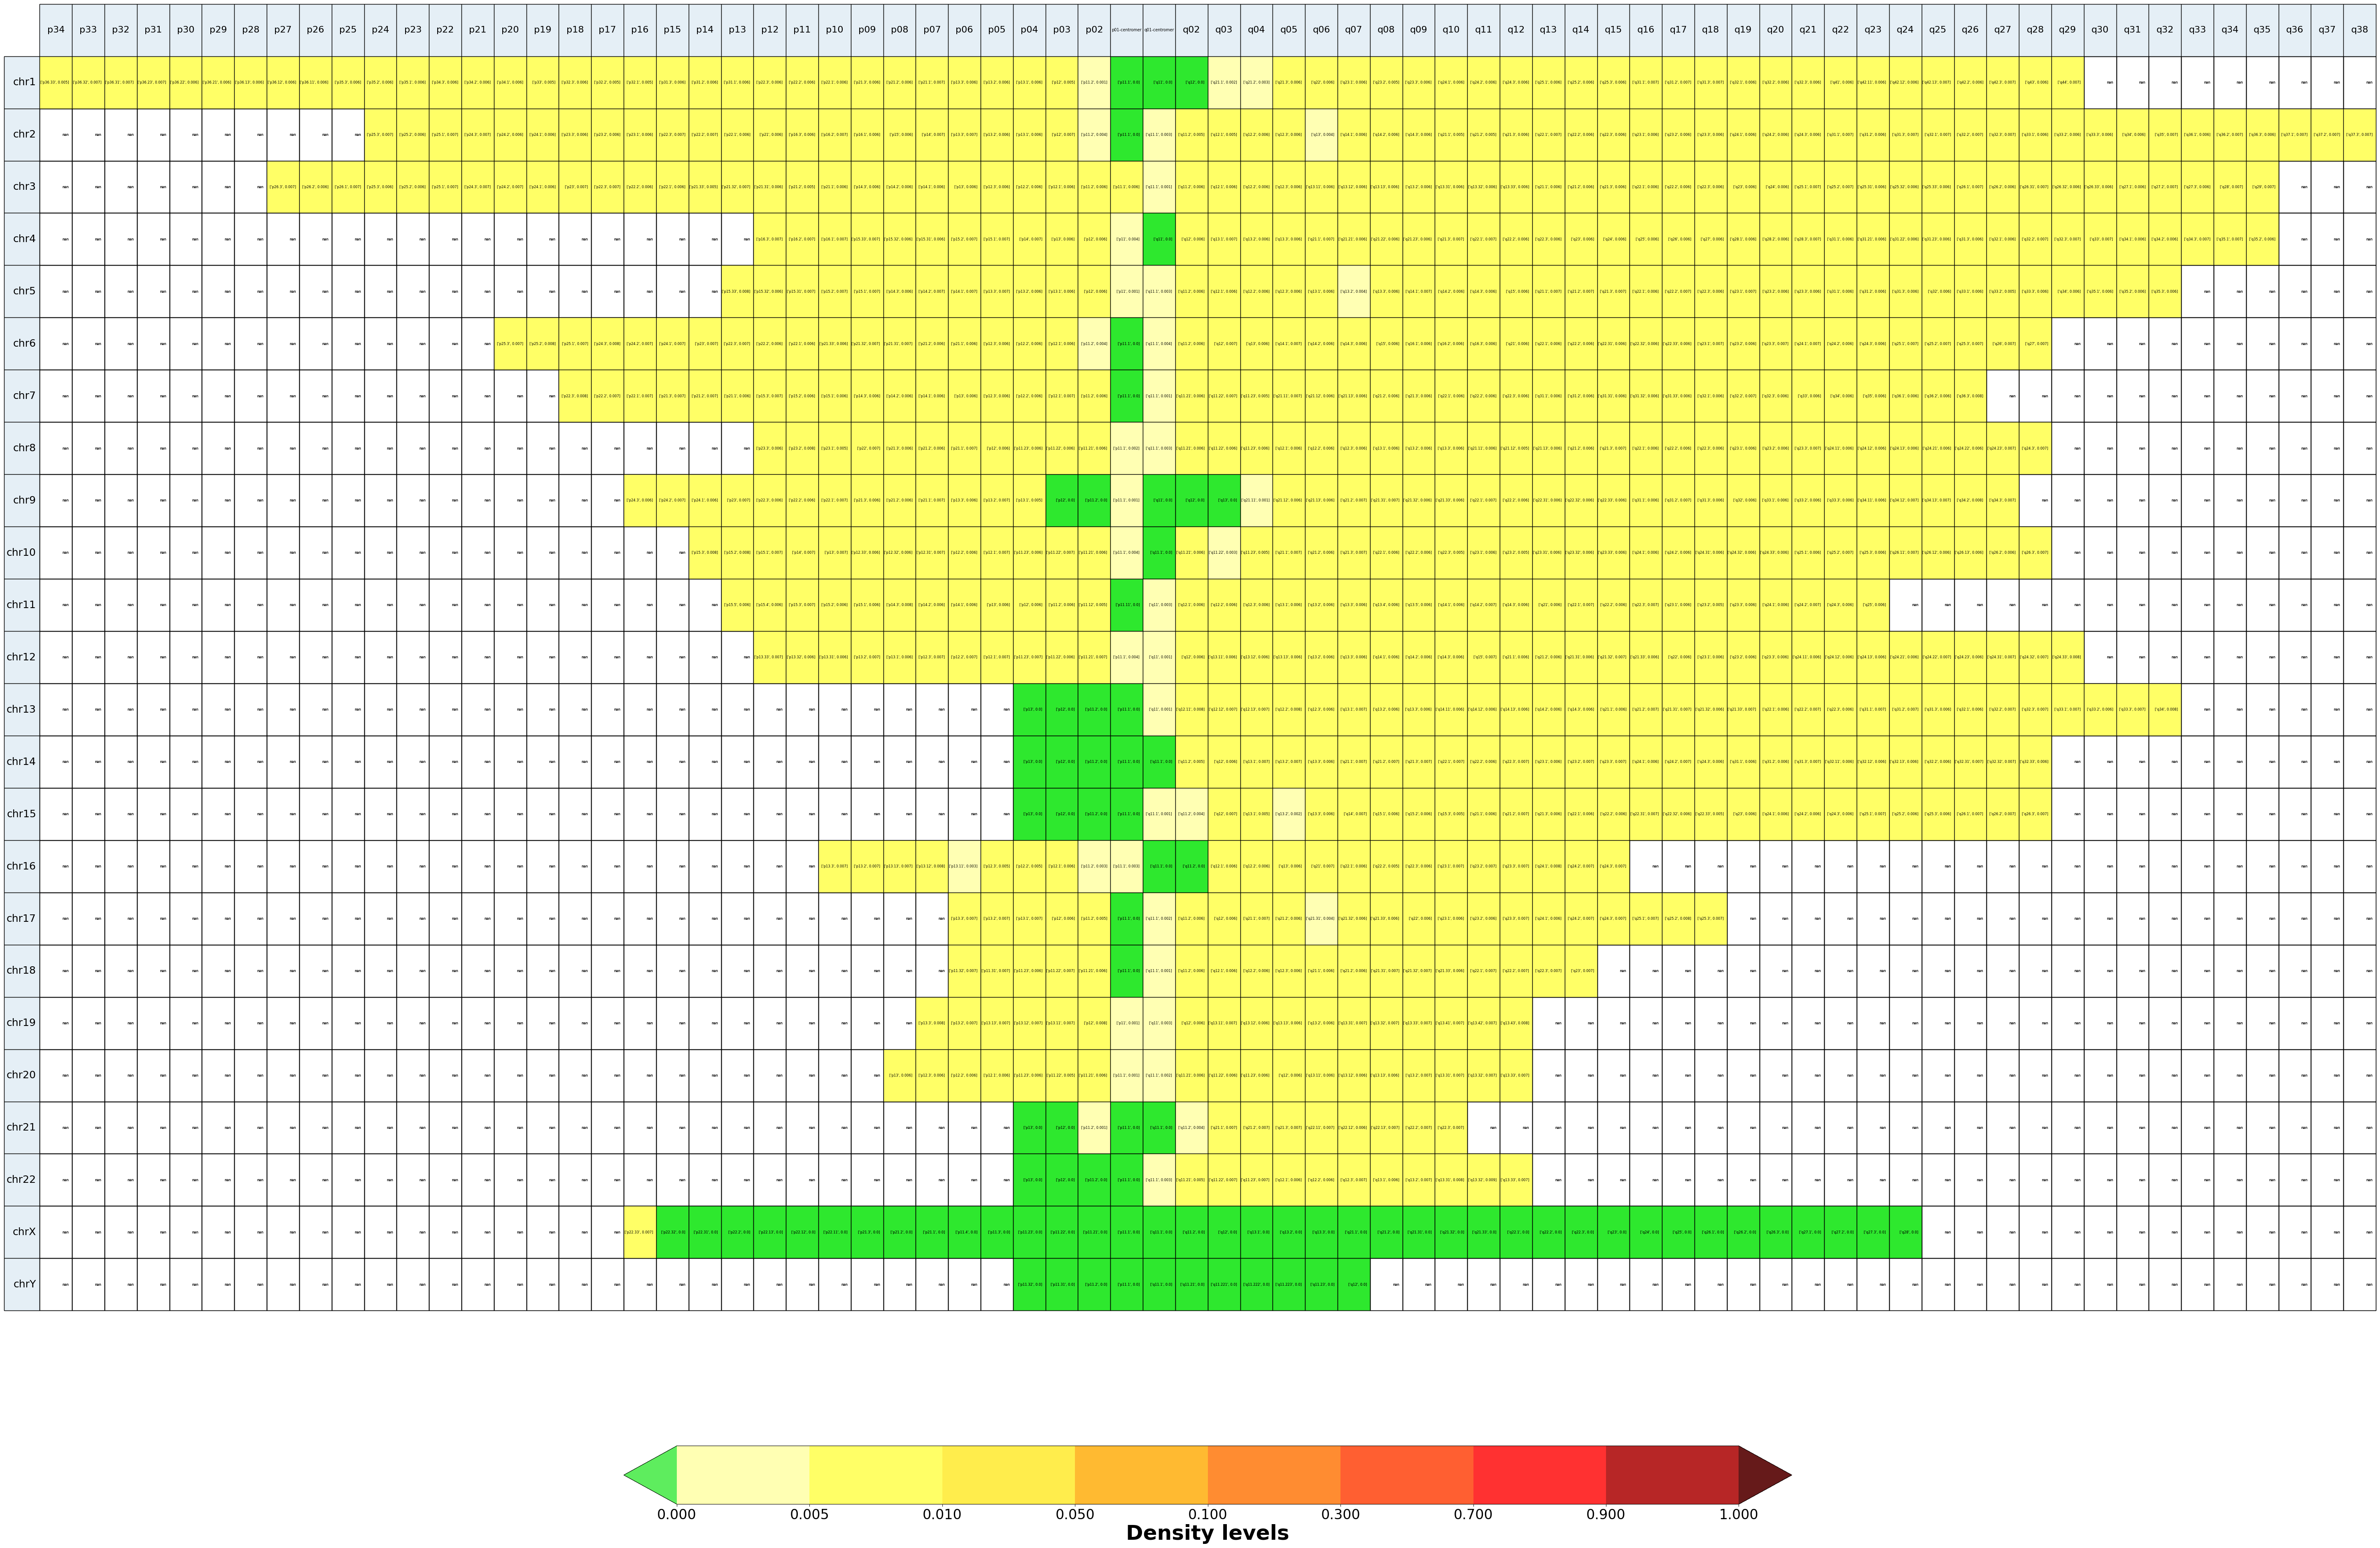

In [49]:
make_one_Dens(cb_df3, "Deletes_density", "Deletes_density_map.pdf")